In [1]:
library(nlme)
library(MASS)
library(multilevel)
library(readr)

In [2]:
datos <- read_csv('/home/taz/Documentos/git/Validacion/Pilotaje_tesis_datos_con_códigos.csv',skip=0, col_names=TRUE)
datos_corregidos <- read_csv('/home/taz/Documentos/git/Validacion/Pilotaje_tesis_datos_corregidos.csv',skip=0, col_names=TRUE)

Parsed with column specification:
cols(
  .default = col_double(),
  `p1 genero` = col_character(),
  `p2 dependencia` = col_character(),
  `p4 profesion` = col_character(),
  `p5 genero-director` = col_character(),
  `p6 genero-utp` = col_character(),
  `p7genero-inspector` = col_character(),
  `p22  requisito-centroestudiante` = col_character(),
  `p23 postulacion-centroestudiantes` = col_character(),
  `p24 eleccion-centroestudiante` = col_character(),
  `p26 relacion-director-estudiante` = col_character(),
  `p27 decisiones-proyectos` = col_character(),
  `p28 rol-centroestudiante` = col_character(),
  `p29 elaboracion-pi` = col_character(),
  `p30 rol-centropadres` = col_character(),
  `p31 obgetivo-pedagogico` = col_character(),
  `p32 rol-director-ciudadania` = col_character(),
  `p33 ciudadania-como` = col_character(),
  `p34 orientacion-director-ciudadania` = col_character(),
  `p35 director-conflicto-estudiantes` = col_character(),
  `p36 director-conflicto-apoderados` = col_

In [3]:
datos_corregidos$`p26 relacion-director-estudiante`[datos_corregidos$`p26 relacion-director-estudiante` == "abierta"] <- 4
datos_corregidos$`p26 relacion-director-estudiante`[datos_corregidos$`p26 relacion-director-estudiante` == "normativa"] <- 3
datos_corregidos$`p26 relacion-director-estudiante`[datos_corregidos$`p26 relacion-director-estudiante` == "direccionada"] <- 2
datos_corregidos$`p26 relacion-director-estudiante`[datos_corregidos$`p26 relacion-director-estudiante` == "no-existe"] <- 1
datos_corregidos$`p26 relacion-director-estudiante`=as.numeric(datos_corregidos$`p26 relacion-director-estudiante`)
#datos_corregidos$`p26 relacion-director-estudiante`

In [4]:
datos_corregidos$`p35 director-conflicto-estudiantes`[datos_corregidos$`p35 director-conflicto-estudiantes` == "oportunidad"] <- 1
datos_corregidos$`p35 director-conflicto-estudiantes`[datos_corregidos$`p35 director-conflicto-estudiantes` == "consenso"] <- 2
datos_corregidos$`p35 director-conflicto-estudiantes`[datos_corregidos$`p35 director-conflicto-estudiantes` == "negacion"] <- 3
datos_corregidos$`p35 director-conflicto-estudiantes`[datos_corregidos$`p35 director-conflicto-estudiantes` == "otro"] <- 4
datos_corregidos$`p35 director-conflicto-estudiantes`=as.numeric(datos_corregidos$`p35 director-conflicto-estudiantes`)
#datos_corregidos$`p35 director-conflicto-estudiantes`

In [5]:
#Corroborar correspondencia
datos_corregidos$`p36 director-conflicto-apoderados`[datos_corregidos$`p36 director-conflicto-apoderados` == "dialogo"] <- 1
datos_corregidos$`p36 director-conflicto-apoderados`[datos_corregidos$`p36 director-conflicto-apoderados` == "imagen"] <- 2
datos_corregidos$`p36 director-conflicto-apoderados`[datos_corregidos$`p36 director-conflicto-apoderados` == "reglas"] <- 3
datos_corregidos$`p36 director-conflicto-apoderados`[datos_corregidos$`p36 director-conflicto-apoderados` == "otro"] <- 4
datos_corregidos$`p36 director-conflicto-apoderados`=as.numeric(datos_corregidos$`p36 director-conflicto-apoderados`)
#datos_corregidos$`p36 director-conflicto-apoderados`

# Fiabilidad

### Se considera que existe una buena consistencia interna cuando el valor de alfa es superior a 0,7, según Formación continuada Diseño y validación de cuestionarios (paper facilitado) en la literatura cláscia es mayor a 0.3 pero hay debate respecto a esto.

# Liderazgo autoritario

### Considerando los NA

In [6]:
as.data.frame(cronbach(datos[,8:17]))

Alpha,N
<dbl>,<int>
0.7573786,97


### Datos faltantes incorporados con moda

In [7]:
as.data.frame(cronbach(datos_corregidos[,8:17]))

Alpha,N
<dbl>,<int>
0.7672131,101


# Formación minimalista

### Considerando los NA

In [8]:
as.data.frame(cronbach(datos[,18:20]))

Alpha,N
<dbl>,<int>
0.6984669,99


### Datos faltantes incorporados con moda

In [9]:
as.data.frame(cronbach(datos_corregidos[,18:20]))

Alpha,N
<dbl>,<int>
0.6987556,101


# Liderazgo

### Data única por reescalamiento de opciones

In [10]:
as.data.frame(cronbach(datos_corregidos[,25:26]))

Alpha,N
<dbl>,<int>
0.7073463,101


# Democracia

### Data única por reescalamiento de opciones

In [11]:
as.data.frame(cronbach(datos_corregidos[,35:36]))

Alpha,N
<dbl>,<int>
0.7616467,101


# Liderazgo democratico

### No existen datos faltantes para estee constructo

In [12]:
as.data.frame(cronbach(datos_corregidos[,37:42]))

Alpha,N
<dbl>,<int>
0.9237079,101


## Mezclando con liderazgo asecas

In [13]:
data_LD=cbind(datos_corregidos[,25:26],datos_corregidos[,37:42])

In [14]:
as.data.frame(cronbach(data_LD))

Alpha,N
<dbl>,<int>
0.9214402,101


# Frecuencia y moda de los datos

In [15]:
library(modeest)

In [16]:
mlv(datos_corregidos$`p12 amenaza-inspectoria`, method = "mfv")

[1] 3

In [17]:
Moda=as.data.frame(apply(datos_corregidos, 2, mlv,  method = "mfv")) #Incorporar frecuencia de la moda absoluta

In [18]:
frecuencia=c()
for (i in 1:42){
    frecuencia=rbind(frecuencia,max(table(datos[,i])))
}

In [19]:
Moda=cbind(Moda,frecuencia)
names(Moda)=c('Dato modal','Frecuencia absoluta')

In [20]:
Moda

,Dato modal,Frecuencia absoluta
,<fct>,<int>
p1 genero,mujer,85
p2 dependencia,municipal,72
p3 edad,2,52
p4 profesion,basica,61
p5 genero-director,mujer,56
p6 genero-utp,mujer,90
p7genero-inspector,mujer,53
p8 decision-autorizacion,3,47
p9 director-encargado-normas,4,41


# Graficos

## Pregunta 1

## Género:

In [21]:
library(RColorBrewer) #Libreria de colores

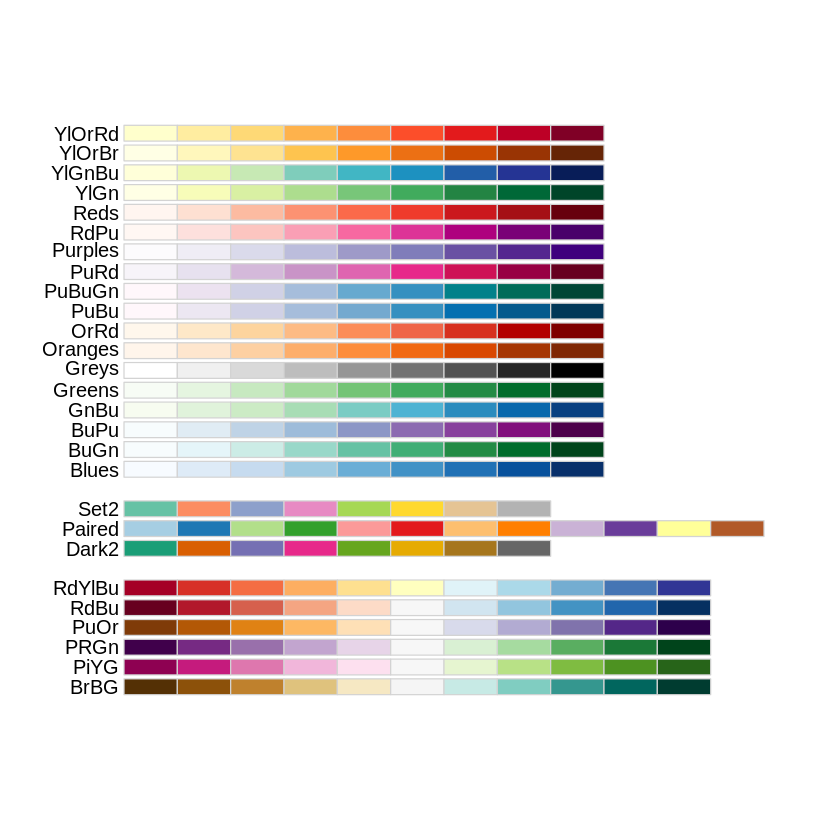

In [22]:
display.brewer.all(colorblindFriendly = T)  
#nombre de paletas de colores en este caso utilizaremos Dark2 por mayor variedad de colores y más accesibilidad para personas en situación de discapacidad visual

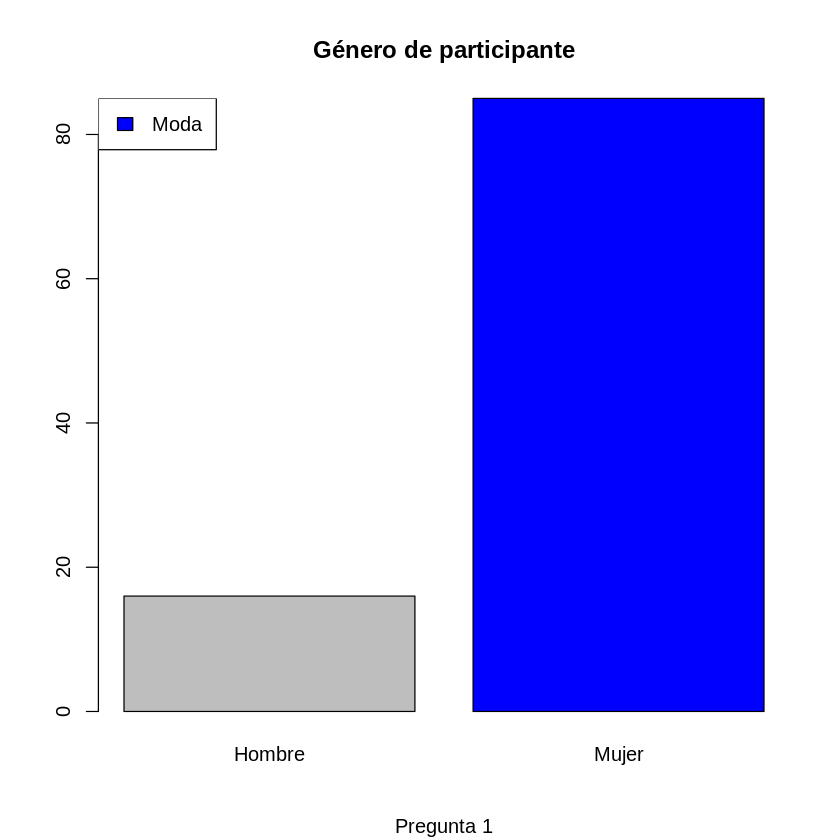

In [23]:
barplot(table(datos[,1]),names.arg=c('Hombre','Mujer'),main = "Género de participante",sub = "Pregunta 1", col = c(rep("gray", 1),4))
legend("topleft", "Moda", fill = 4) 

In [24]:
porcentajes <- as.numeric(round(((prop.table(table(datos[,1])))*100),2))
etiquetas <- c("Hombre", "Mujer")
etiquetas <- paste(etiquetas, porcentajes)
etiquetas <- paste(etiquetas, "%", sep = "")

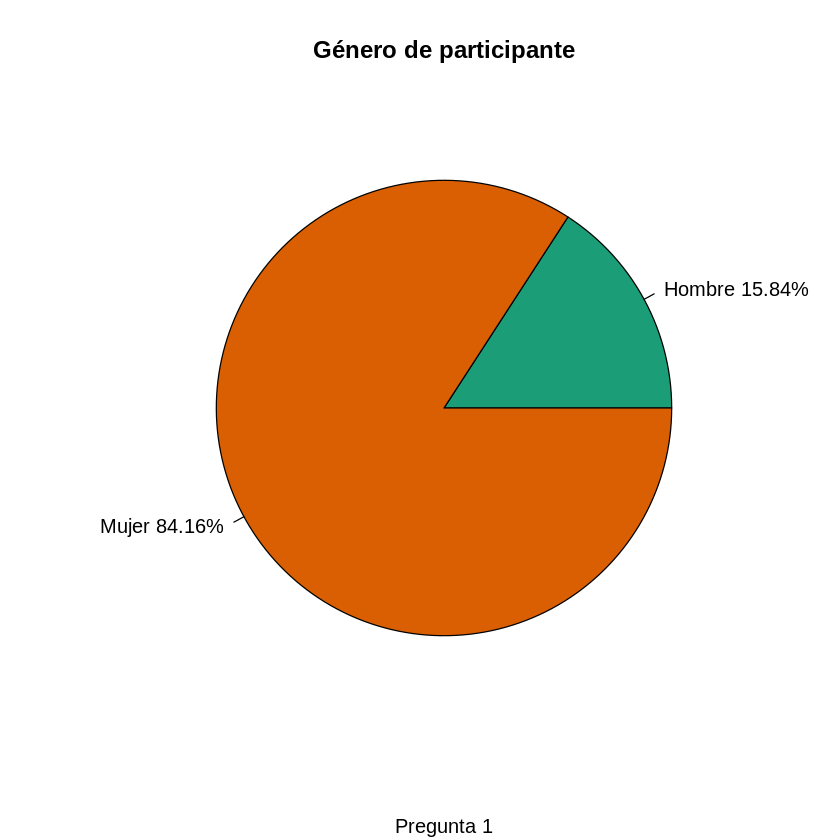

In [25]:
pie(porcentajes, etiquetas,
    main = "Género de participante",
    sub = "Pregunta 1",
   col=brewer.pal(4, "Dark2"))

## Pregunta 2

## Tipo de dependencia de la escuela donde trabaja:

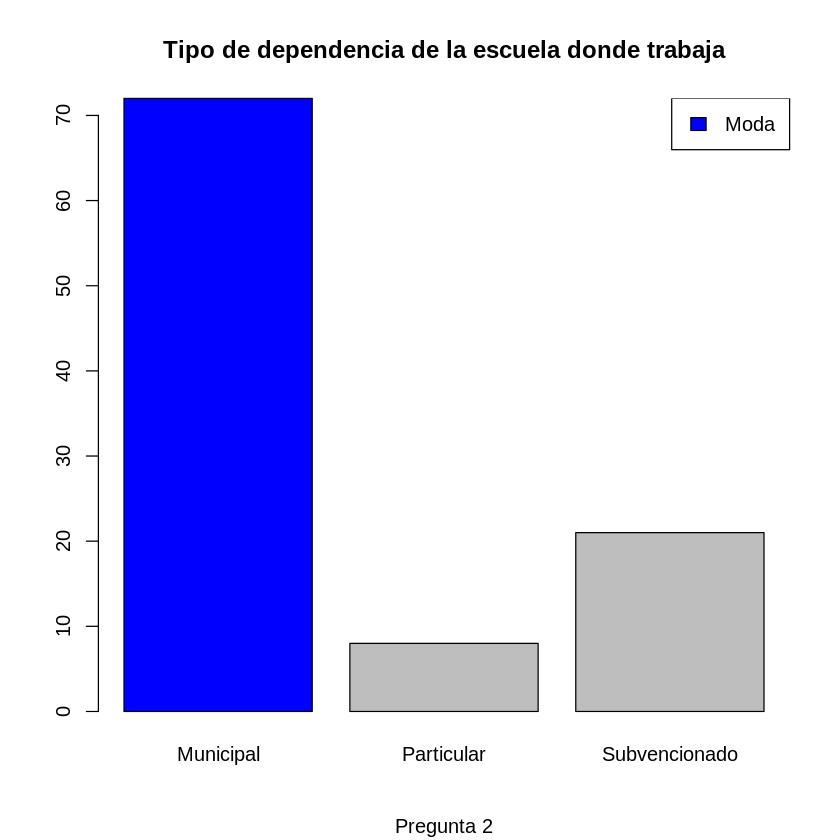

In [26]:
barplot(table(datos[,2]),names.arg=c('Municipal','Particular','Subvencionado'),main = "Tipo de dependencia de la escuela donde trabaja", col = c(4,rep("gray", 2)),sub='Pregunta 2')
legend("topright", "Moda", fill = 4)

In [27]:
porcentajes <- as.numeric(round(((prop.table(table(datos[,2])))*100),2))
etiquetas <- c("Municipal", "particular","Subvencionado")
etiquetas <- paste(etiquetas, porcentajes)
etiquetas <- paste(etiquetas, "%", sep = "")

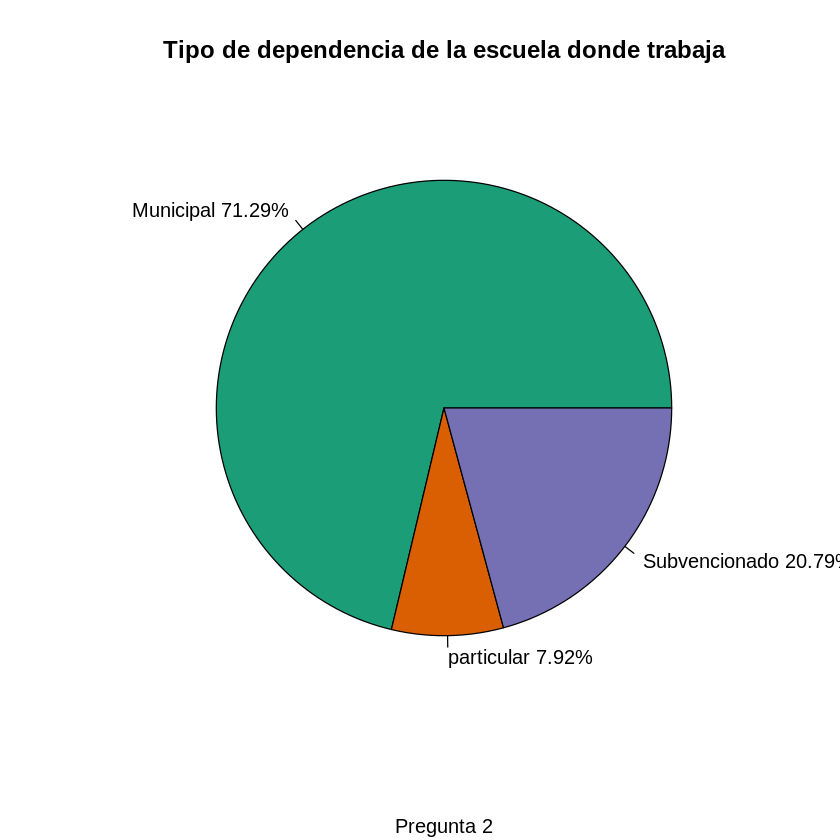

In [28]:
pie(porcentajes, etiquetas,
    main = "Tipo de dependencia de la escuela donde trabaja",
    sub = "Pregunta 2",
   col=brewer.pal(4, "Dark2"))

## Pregunta 3

## Edad:

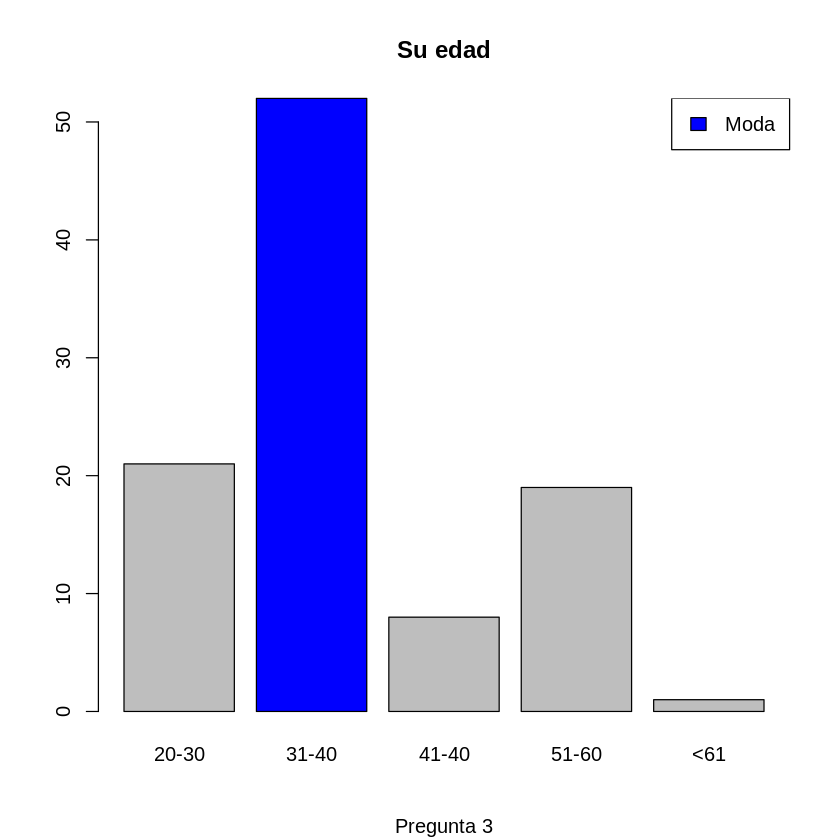

In [29]:
barplot(table(datos[,3]),names.arg=c('20-30','31-40','41-40','51-60','<61'),main = "Su edad", col = c("gray",4,rep("gray", 3)),sub='Pregunta 3')
legend("topright", "Moda", fill = 4)

## Pregunta 4

## Profesión

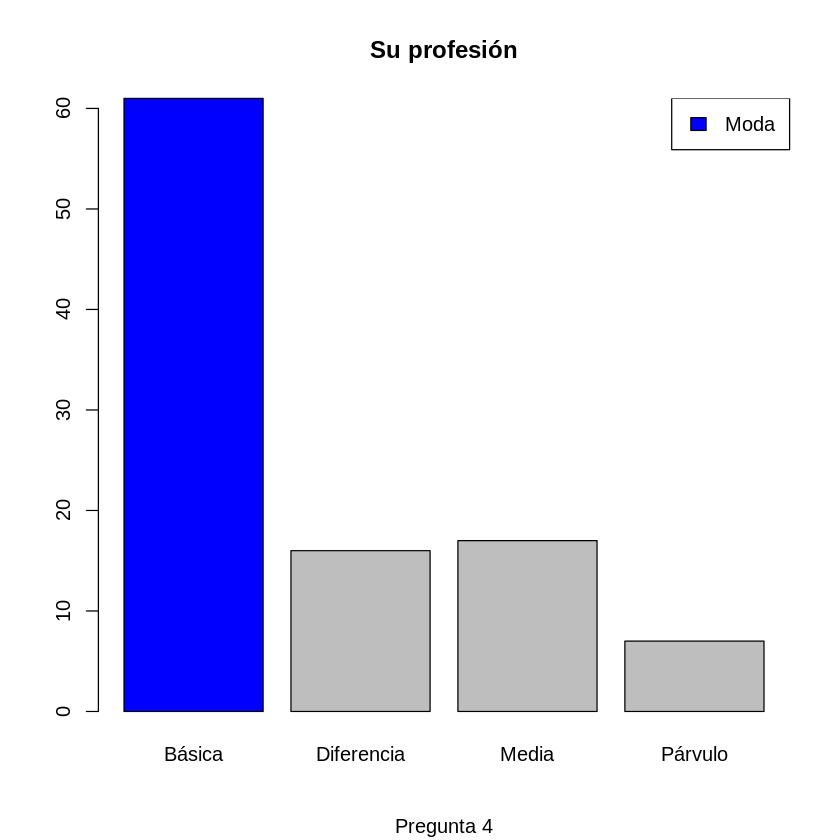

In [30]:
barplot(table(datos[,4]),names.arg=c('Básica','Diferencia','Media','Párvulo'),main = "Su profesión", col = c(4,rep("gray", 3)), sub='Pregunta 4')
legend("topright", "Moda", fill = 4) #Básica, Párvulo

## Pregunta 5

## Genero de director(a)

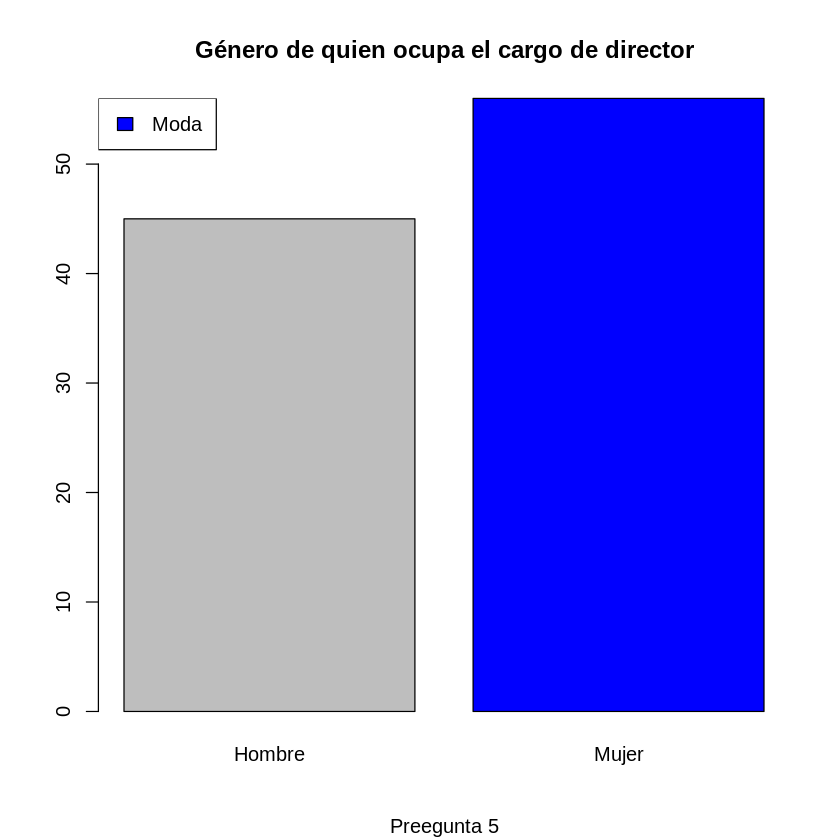

In [31]:
barplot(table(datos[,5]),names.arg=c('Hombre','Mujer'),main = "Género de quien ocupa el cargo de director", col = c(rep("gray", 1),4), sub='Preegunta 5')
legend("topleft", "Moda", fill = 4)

## Pregunta 6

## Género UTP

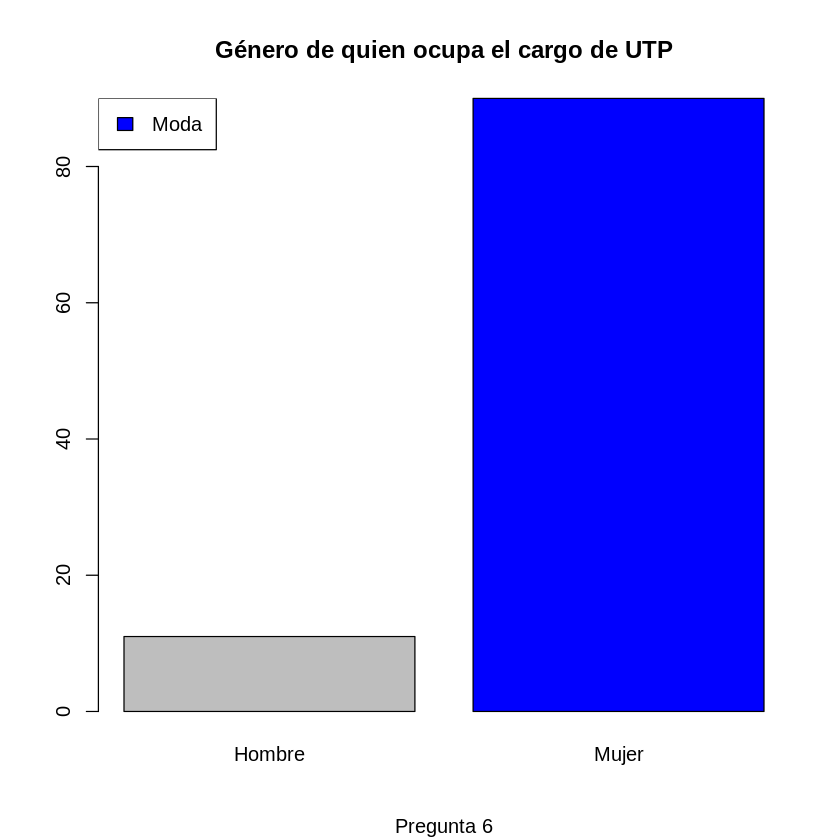

In [32]:
barplot(table(datos[,6]),names.arg=c('Hombre','Mujer'),main = "Género de quien ocupa el cargo de UTP", col = c(rep("gray", 1),4),sub='Pregunta 6')
legend("topleft", "Moda", fill = 4)

## Pregunta 7

## Género inspector(a) general

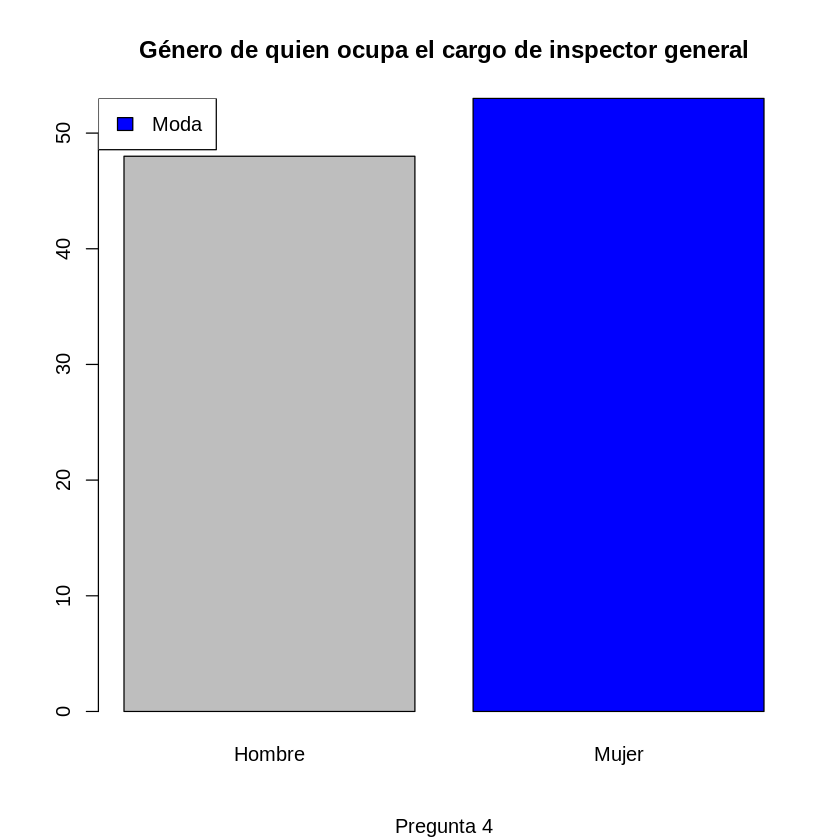

In [33]:
barplot(table(datos[,7]),names.arg=c('Hombre','Mujer'),main = "Género de quien ocupa el cargo de inspector general", col = c(rep("gray", 1),4),sub='Pregunta 4')
legend("topleft", "Moda", fill = 4)

# Analisis de clases latentes para data nominal


In [34]:
library(scatterplot3d)
library(poLCA)

# Democracia


In [35]:
datos_corregidos$`p22  requisito-centroestudiante`[datos_corregidos$`p22  requisito-centroestudiante` == "Sí"] <- 1
datos_corregidos$`p22  requisito-centroestudiante`[datos_corregidos$`p22  requisito-centroestudiante` == "No"] <- 2
datos_corregidos$`p22  requisito-centroestudiante`=as.numeric(datos_corregidos$`p22  requisito-centroestudiante`)
#datos_corregidos$`p22  requisito-centroestudiante`

In [36]:
datos_corregidos$`p23 postulacion-centroestudiantes`[datos_corregidos$`p23 postulacion-centroestudiantes` == "lista"] <- 1
datos_corregidos$`p23 postulacion-centroestudiantes`[datos_corregidos$`p23 postulacion-centroestudiantes` == "individual"] <- 2
datos_corregidos$`p23 postulacion-centroestudiantes`[datos_corregidos$`p23 postulacion-centroestudiantes` == "eleccion-directorios"] <- 3
datos_corregidos$`p23 postulacion-centroestudiantes`[datos_corregidos$`p23 postulacion-centroestudiantes` == "representante-curso"] <- 4
datos_corregidos$`p23 postulacion-centroestudiantes`[datos_corregidos$`p23 postulacion-centroestudiantes` == "otro"] <- 5
datos_corregidos$`p23 postulacion-centroestudiantes`=as.numeric(datos_corregidos$`p23 postulacion-centroestudiantes`)
#datos_corregidos$`p23 postulacion-centroestudiantes`

In [37]:
datos_corregidos$`p24 eleccion-centroestudiante`[datos_corregidos$`p24 eleccion-centroestudiante` == "votacion-estudiantes"] <- 1
datos_corregidos$`p24 eleccion-centroestudiante`[datos_corregidos$`p24 eleccion-centroestudiante` == "designacion-directivos"] <- 2
datos_corregidos$`p24 eleccion-centroestudiante`[datos_corregidos$`p24 eleccion-centroestudiante` == "eleccion-curso"] <- 3
datos_corregidos$`p24 eleccion-centroestudiante`[datos_corregidos$`p24 eleccion-centroestudiante` == "otro"] <- 4
datos_corregidos$`p24 eleccion-centroestudiante`=as.numeric(datos_corregidos$`p24 eleccion-centroestudiante`)
#datos_corregidos$`p24 eleccion-centroestudiante`

In [38]:
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "autoridad-total"] <- 1
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "equipo-directivo"] <- 2
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "director-comunidad"] <- 3
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "no-involucrado"] <- 4
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "administrador"] <- 5
datos_corregidos$`p27 decisiones-proyectos`[datos_corregidos$`p27 decisiones-proyectos` == "Ninguna de las anteriores"] <- 6
datos_corregidos$`p27 decisiones-proyectos`=as.numeric(datos_corregidos$`p27 decisiones-proyectos`)
#datos_corregidos$`p27 decisiones-proyectos`

In [39]:
datos_corregidos$`p28 rol-centroestudiante`[datos_corregidos$`p28 rol-centroestudiante` == "canalizadores"] <- 1
datos_corregidos$`p28 rol-centroestudiante`[datos_corregidos$`p28 rol-centroestudiante` == "representantes"] <- 2
datos_corregidos$`p28 rol-centroestudiante`[datos_corregidos$`p28 rol-centroestudiante` == "administradores"] <- 3
datos_corregidos$`p28 rol-centroestudiante`[datos_corregidos$`p28 rol-centroestudiante` == "ninguna"] <- 4
datos_corregidos$`p28 rol-centroestudiante`=as.numeric(datos_corregidos$`p28 rol-centroestudiante`)
#datos_corregidos$`p28 rol-centroestudiante`

In [40]:
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "representantes"] <- 1
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "reunion-abierta"] <- 2
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "comunidad"] <- 3
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "sontenedor-director"] <- 4
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "escogidos"] <- 5
datos_corregidos$`p29 elaboracion-pi`[datos_corregidos$`p29 elaboracion-pi` == "ninguna-anterior"] <- 6
datos_corregidos$`p29 elaboracion-pi`=as.numeric(datos_corregidos$`p29 elaboracion-pi`)
#datos_corregidos$`p29 elaboracion-pi`

In [41]:
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "organizador"] <- 1
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "administrador"] <- 2
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "representar"] <- 3
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "gestor"] <- 4
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "velar-normas"] <- 5
datos_corregidos$`p30 rol-centropadres`[datos_corregidos$`p30 rol-centropadres` == "ninguna-anterior"] <- 6
datos_corregidos$`p30 rol-centropadres`=as.numeric(datos_corregidos$`p30 rol-centropadres`)
#datos_corregidos$`p30 rol-centropadres`

In [42]:
#Data democracia
data_democracia=cbind(datos_corregidos[,21:24],datos_corregidos[,27:30],datos_corregidos[,35:36])
names(data_democracia)=c('p21','p22','p23','p24','p27','p28','p29','p30','p35','p36')

In [43]:
f_democracia <- cbind(`p21`,`p22`,`p23`,`p24`,`p27`,`p28`,`p29`,`p30`,`p35`,`p36`)~1

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p21
           Pr(1) Pr(2)  Pr(3)  Pr(4)
class 1:  0.1683 0.396 0.3762 0.0594

$p22
           Pr(1)  Pr(2)
class 1:  0.5545 0.4455

$p23
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.7129 0.0792 0.0396 0.1485 0.0198

$p24
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.9109 0.0099 0.0693 0.0099

$p27
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.0495 0.3663 0.5347 0.0297 0.0198

$p28
           Pr(1)  Pr(2)  Pr(3) Pr(4)
class 1:  0.4356 0.3861 0.0792 0.099

$p29
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.4554 0.2277 0.0198 0.1188 0.0891 0.0891

$p30
           Pr(1)  Pr(2) Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.3069 0.0198 0.297 0.3168 0.0099 0.0495

$p35
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.4455 0.3267 0.1782 0.0495

$p36
           Pr(1) Pr(2)  Pr(3)  Pr(4)
class 1:  0.3564 0.495 0.1089 0.0396

Estimated class population shares 
 

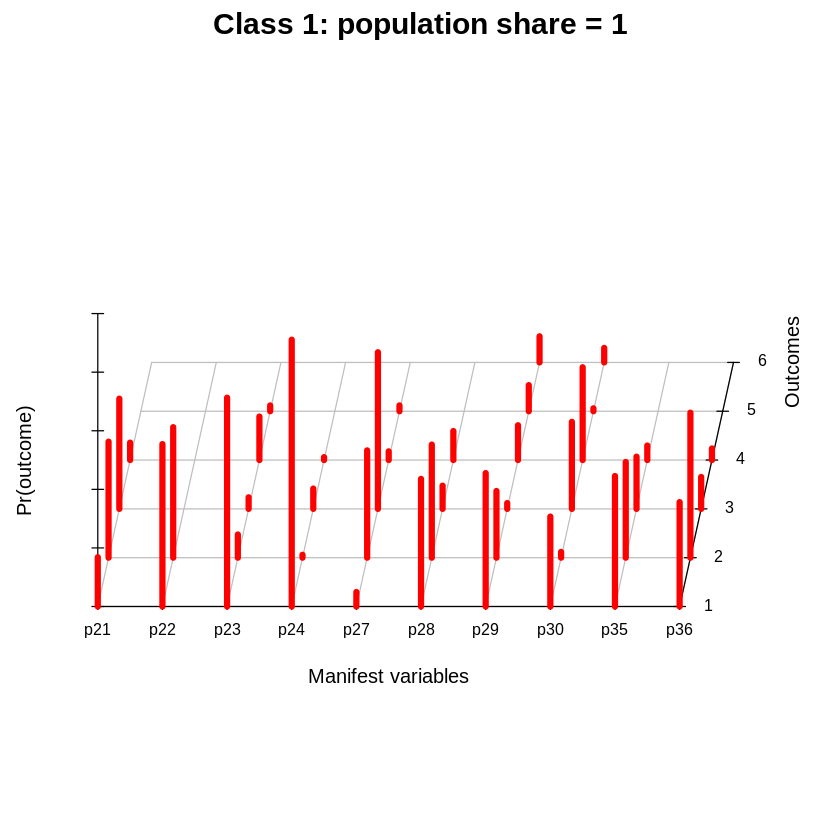

In [44]:
funcion <- poLCA(f_democracia, data=data_democracia, nclass = 1, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

Ajuste a una clase latente
========================================================= 
Numero de datos: 101 

Numero de parametros estimados: 35 

Grados de libertad: 66 

Maxima log-verosimilutd: -1056.233 Es una medida de ajuste del modelo

Coeficiente de Akaike (Mientras más pequeño el AIC es mejor modeelo comparativamente, la comparación sólo es valida entre conjuntos con las mismas variables. Pero es sensible al numero de datos)

AIC(1): 2182.466

Coeficiente BIC (Igual al anterior, es menos sensible a la cantidad de datos, pero en este caso se estanca siempre en 1, este es sensible a los grados de libertad)

BIC(1): 2273.995

G^2(1): 1194.074 (Likelihood ratio/deviance statistic) 

X^2(1): 34719369 (Chi-square goodness of fit) 

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p21
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.1584 0.3646 0.4125 0.0645
class 2:  0.1969 0.4864 0.2720 0.0447

$p22
           Pr(1)  Pr(2)
class 1:  0.6239 0.3761
class 2:  0.3548 0.6452

$p23
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.8201 0.0145 0.0385 0.1268 0.0000
class 2:  0.4047 0.2650 0.0427 0.2109 0.0767

$p24
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.9583 0.0133 0.0284 0.0000
class 2:  0.7747 0.0000 0.1870 0.0384

$p27
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.0143 0.4021 0.5704 0.0132 0.0000
class 2:  0.1508 0.2636 0.4319 0.0770 0.0767

$p28
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.5169 0.4235 0.0596 0.0000
class 2:  0.2022 0.2787 0.1356 0.3836

$p29
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.4977 0.2912 0.0267 0.0546 0.0899 0.0399
class 2:  0.3341 0.0452 0.0000 0.3034 0.0867 0.2306

$p30
           Pr(1) 

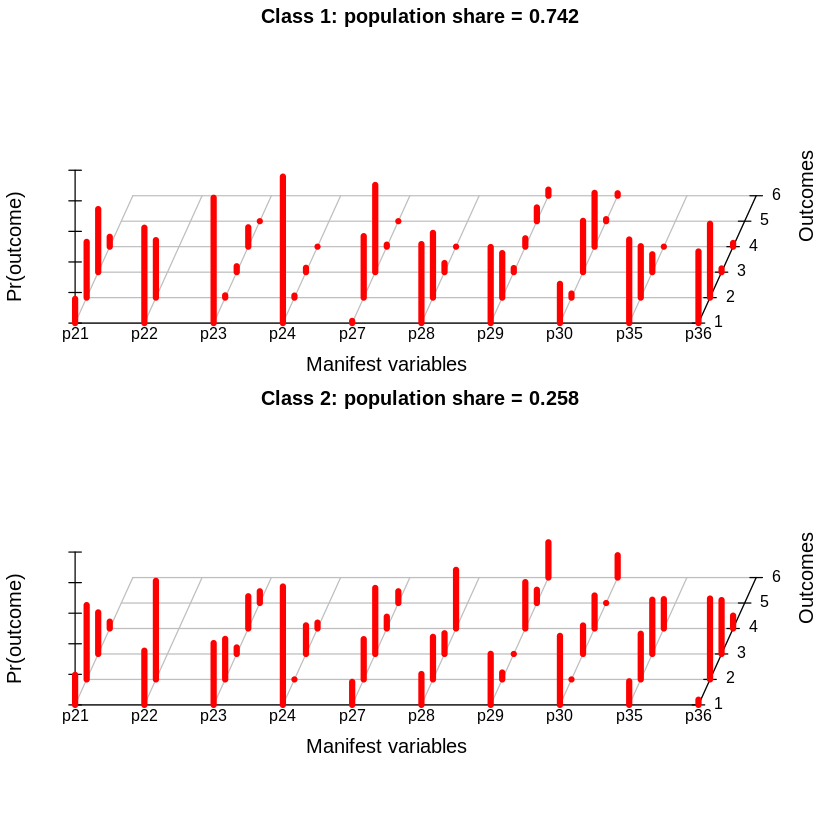

In [45]:
funcion <- poLCA(f_democracia, data=data_democracia, nclass = 2, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

# Este es el mejor modelo según AIC

Ajuste a dos clases latentes
========================================================= 
Numero de datos: 101 

Numero de parametros estimados: 71 

Grados de libertad: 30 

Maxima log-verosimilutd: -1056.233 Es una medida de ajuste del modelo

Coeficiente de Akaike (Mientras más pequeño el AIC es mejor modeelo comparativamente, la comparación sólo es valida entre conjuntos con las mismas variables. Pero es sensible al numero de datos)

AIC(1): 2162.313

Coeficiente BIC (Igual al anterior, es menos sensible a la cantidad de datos, pero en este caso se estanca siempre en 1, este es sensible a los grados de libertad)

BIC(1): 2347.986

G^2(1): 1101.921 (Likelihood ratio/deviance statistic) 

X^2(1): 416557 (Chi-square goodness of fit) 

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p21
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.1284 0.3387 0.5329 0.0000
class 2:  0.2390 0.3514 0.3267 0.0830
class 3:  0.1294 0.5019 0.2769 0.0918

$p22
           Pr(1)  Pr(2)
class 1:  0.6614 0.3386
class 2:  0.6189 0.3811
class 3:  0.3779 0.6221

$p23
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.8079 0.0000 0.0388 0.1533 0.0000
class 2:  0.7828 0.0277 0.0000 0.1895 0.0000
class 3:  0.5420 0.2141 0.0843 0.0984 0.0612

$p24
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.9717 0.0000 0.0283 0.0000
class 2:  0.9173 0.0000 0.0827 0.0000
class 3:  0.8440 0.0306 0.0948 0.0306

$p27
          Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)
class 1:  0.000 0.5088 0.4912 0.0000 0.0000
class 2:  0.000 0.3188 0.6259 0.0277 0.0277
class 3:  0.153 0.2788 0.4765 0.0612 0.0306

$p28
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.2976 0.6756 0.0268 0.0000
class 2:  0.6561 0.2609 0.0553 0.0277

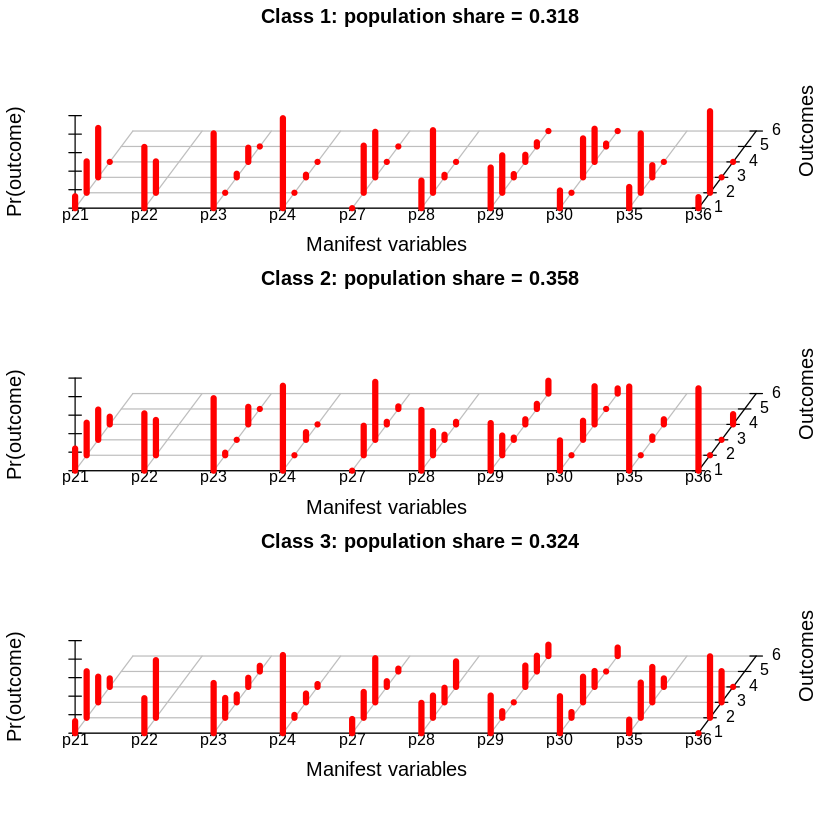

In [46]:
funcion <- poLCA(f_democracia, data=data_democracia, nclass = 3, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

Ajuste a dos clases latentes
========================================================= 
Numero de datos: 101 

Numero de parametros estimados: 107 

Grados de libertad: -6

Maxima log-verosimilutd: -978.2059 Es una medida de ajuste del modelo

Coeficiente de Akaike (Mientras más pequeño el AIC es mejor modeelo comparativamente, la comparación sólo es valida entre conjuntos con las mismas variables. Pero es sensible al numero de datos)

AIC(1): 2170.412

Coeficiente BIC (Igual al anterior, es menos sensible a la cantidad de datos, pero en este caso se estanca siempre en 1, este es sensible a los grados de libertad)

BIC(1): 2450.23

G^2(1): 1038.02 (Likelihood ratio/deviance statistic) 

X^2(1): 921951.4 (Chi-square goodness of fit) 

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p21
           Pr(1)  Pr(2) Pr(3)  Pr(4)
class 1:  0.4175 0.5011 0.000 0.0814
class 2:  0.0000 0.3950 0.605 0.0000
class 3:  0.1250 0.5000 0.375 0.0000
class 4:  0.1745 0.3623 0.383 0.0802

$p22
           Pr(1)  Pr(2)
class 1:  0.4680 0.5320
class 2:  0.3569 0.6431
class 3:  0.2500 0.7500
class 4:  0.6689 0.3311

$p23
           Pr(1)  Pr(2)  Pr(3)  Pr(4) Pr(5)
class 1:  0.6720 0.1651 0.1629 0.0000  0.00
class 2:  0.4971 0.2702 0.1087 0.1240  0.00
class 3:  0.3750 0.0000 0.0000 0.3750  0.25
class 4:  0.8280 0.0161 0.0000 0.1559  0.00

$p24
           Pr(1)  Pr(2)  Pr(3) Pr(4)
class 1:  0.9170 0.0000 0.0830 0.000
class 2:  0.7827 0.0544 0.1630 0.000
class 3:  0.8750 0.0000 0.0000 0.125
class 4:  0.9521 0.0000 0.0479 0.000

$p27
           Pr(1)  Pr(2)  Pr(3) Pr(4) Pr(5)
class 1:  0.4072 0.4179 0.1749 0.000  0.00
class 2:  0.0000 0.3674 0.6326 0.000  0.00
class 3:  0.0000 0.1250 0.3750 0.250

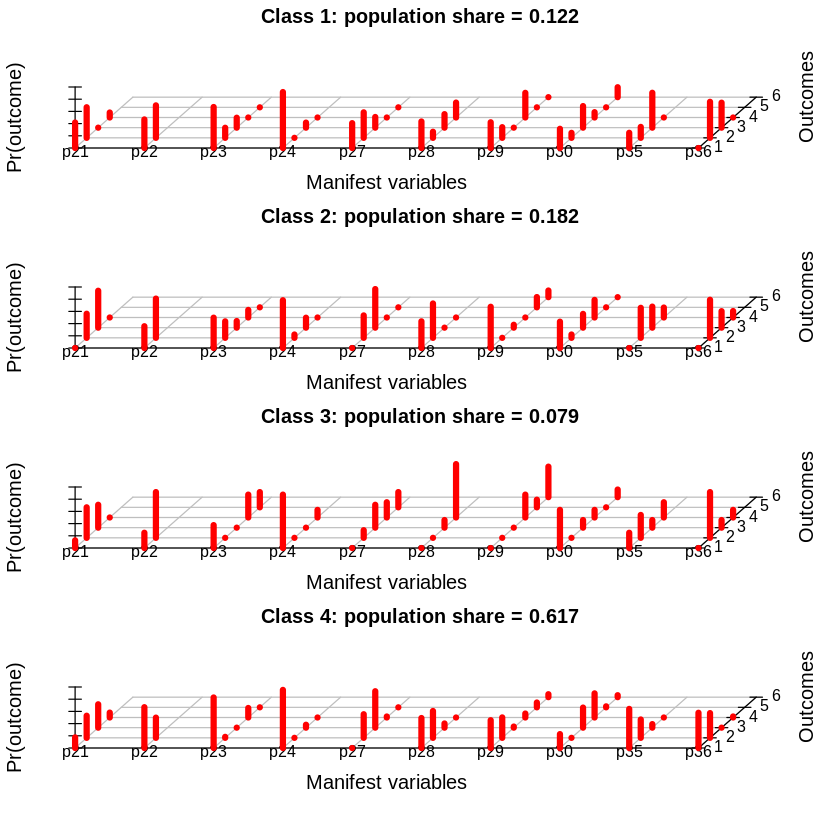

In [47]:
funcion <- poLCA(f_democracia, data=data_democracia, nclass = 4, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

Ajuste a dos clases latentes
========================================================= 
Numero de datos: 101 

Numero de parametros estimados: 143 

Grados de libertad: -42

Maxima log-verosimilutd: -943.3045 Es una medida de ajuste del modelo

Coeficiente de Akaike (Mientras más pequeño el AIC es mejor modeelo comparativamente, la comparación sólo es valida entre conjuntos con las mismas variables. Pero es sensible al numero de datos)

AIC(1): 2172.609

Coeficiente BIC (Igual al anterior, es menos sensible a la cantidad de datos, pero en este caso se estanca siempre en 1, este es sensible a los grados de libertad)

BIC(1): 2546.571

G^2(1): 968.2177 (Likelihood ratio/deviance statistic) 

X^2(1): 407064.3 (Chi-square goodness of fit) 

# Ciudadanía

In [48]:
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "diciplinares"] <- 1
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "laborales"] <- 2
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "altos-puntajes"] <- 3
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "comunitarios"] <- 4
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "inclusivos"] <- 5
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "confesionarios"] <- 6
datos_corregidos$`p31 obgetivo-pedagogico`[datos_corregidos$`p31 obgetivo-pedagogico` == "ninguna-anterior"] <- 7
datos_corregidos$`p31 obgetivo-pedagogico`=as.numeric(datos_corregidos$`p31 obgetivo-pedagogico`)
#datos_corregidos$`p31 obgetivo-pedagogico`

In [49]:
datos_corregidos$`p32 rol-director-ciudadania`[datos_corregidos$`p32 rol-director-ciudadania` == "supervisar-cumplimiento"] <- 1
datos_corregidos$`p32 rol-director-ciudadania`[datos_corregidos$`p32 rol-director-ciudadania` == "entregar-recursos"] <- 2
datos_corregidos$`p32 rol-director-ciudadania`[datos_corregidos$`p32 rol-director-ciudadania` == "promover-ciudadania"] <- 3
datos_corregidos$`p32 rol-director-ciudadania`[datos_corregidos$`p32 rol-director-ciudadania` == "sin-rol"] <- 4
datos_corregidos$`p32 rol-director-ciudadania`[datos_corregidos$`p32 rol-director-ciudadania` == "ninguna-anterior "] <- 5
datos_corregidos$`p32 rol-director-ciudadania`=as.numeric(datos_corregidos$`p32 rol-director-ciudadania`)
#datos_corregidos$`p32 rol-director-ciudadania`

Warning message in eval(expr, envir, enclos):
“NAs introducidos por coerción”


In [50]:
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "asignatura"] <- 1
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "historia"] <- 2
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "orientacion"] <- 3
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "transversal"] <- 4
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "otra"] <- 5
datos_corregidos$`p33 ciudadania-como`[datos_corregidos$`p33 ciudadania-como` == "no-se-realiza"] <- 6
datos_corregidos$`p33 ciudadania-como`=as.numeric(datos_corregidos$`p33 ciudadania-como`)
#datos_corregidos$`p33 ciudadania-como`

In [51]:
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "democracia"] <- 1
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "agencia-calidad "] <- 2
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "curriculo"] <- 3
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "simce"] <- 4
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "no-orientación"] <- 5
datos_corregidos$`p34 orientacion-director-ciudadania`[datos_corregidos$`p34 orientacion-director-ciudadania` == "otro"] <- 6
datos_corregidos$`p34 orientacion-director-ciudadania`=as.numeric(datos_corregidos$`p34 orientacion-director-ciudadania`)

Warning message in eval(expr, envir, enclos):
“NAs introducidos por coerción”


In [52]:
table(datos_corregidos$`p34 orientacion-director-ciudadania`)


 1  3  4  5  6 
33 24  3 26  3 

In [53]:
#Data democracia
data_ciudadania=datos_corregidos[,31:34]
names(data_ciudadania)=c('p31','p32','p33','p34')

In [54]:
f_ciudadania <- cbind(`p31`,`p32`,`p33`,`p34`)~1

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p31
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5) Pr(6)  Pr(7)
class 1:  0.1299 0.0519 0.0649 0.4416 0.2338     0 0.0779

$p32
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.1039 0.1429 0.5325 0.2208

$p33
           Pr(1)  Pr(2)  Pr(3)  Pr(4) Pr(5) Pr(6)
class 1:  0.2078 0.2987 0.0909 0.3766 0.013 0.013

$p34
           Pr(1) Pr(2)  Pr(3) Pr(4)  Pr(5) Pr(6)
class 1:  0.4026     0 0.2987 0.039 0.2468 0.013

Estimated class population shares 
 1 
 
Predicted class memberships (by modal posterior prob.) 
 1 
 
Fit for 1 latent classes: 
number of observations: 77 
number of estimated parameters: 19 
residual degrees of freedom: 58 
maximum log-likelihood: -409.606 
 
AIC(1): 857.212
BIC(1): 901.7443
G^2(1): 216.6338 (Likelihood ratio/deviance statistic) 
X^2(1): 2033.083 (Chi-square goodness of fit) 
 


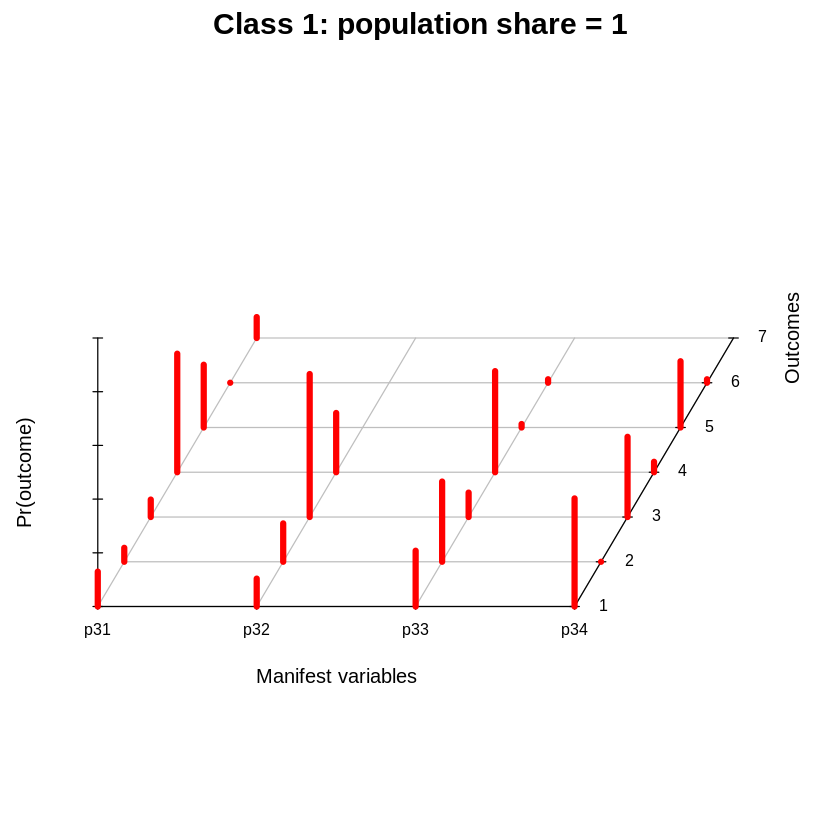

In [55]:
funcion <- poLCA(f_ciudadania, data=data_ciudadania, nclass = 1, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

Ajuste a una clase latente
========================================================= 
Numero de datos: 101 

Numero de parametros estimados: 20

Grados de libertad: 81 

Maxima log-verosimilutd: -610.3298 Es una medida de ajuste del modelo

Coeficiente de Akaike (Mientras más pequeño el AIC es mejor modeelo comparativamente, la comparación sólo es valida entre conjuntos con las mismas variables. Pero es sensible al numero de datos)

AIC(1): 1260.66

Coeficiente BIC (Igual al anterior, es menos sensible a la cantidad de datos, pero en este caso se estanca siempre en 1, este es sensible a los grados de libertad)

BIC(1): 1312.962

G^2(1): 361.3647 (Likelihood ratio/deviance statistic) 

X^2(1): 2669.052 (Chi-square goodness of fit) 

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p31
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5) Pr(6)  Pr(7)
class 1:  0.1026 0.0496 0.0664 0.4811 0.2663     0 0.0339
class 2:  0.2321 0.0606 0.0593 0.2936 0.1118     0 0.2426

$p32
           Pr(1) Pr(2)  Pr(3)  Pr(4)
class 1:  0.1010 0.181 0.6747 0.0434
class 2:  0.1148 0.000 0.0000 0.8852

$p33
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.2183 0.2838 0.0496 0.4319 0.0165 0.0000
class 2:  0.1685 0.3546 0.2457 0.1697 0.0000 0.0616

$p34
           Pr(1) Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.5101     0 0.3452 0.0352 0.1095 0.0000
class 2:  0.0000     0 0.1247 0.0532 0.7605 0.0616

Estimated class population shares 
 0.7892 0.2108 
 
Predicted class memberships (by modal posterior prob.) 
 0.7792 0.2208 
 
Fit for 2 latent classes: 
number of observations: 77 
number of estimated parameters: 39 
residual degrees of freedom: 38 
maximum log-likelihood: -389.1774 


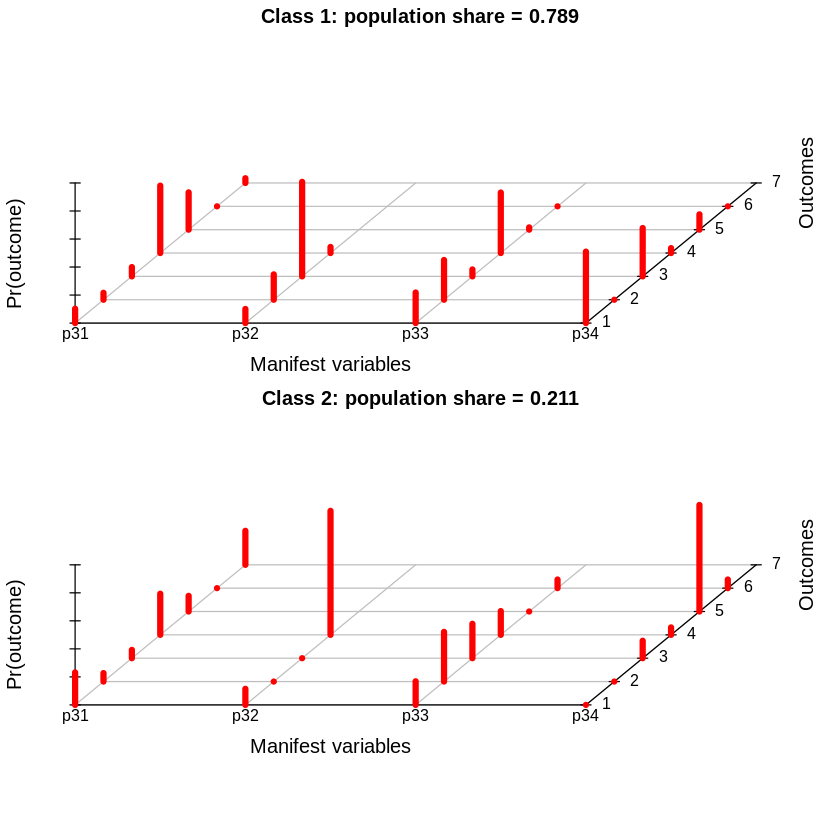

In [56]:
funcion <- poLCA(f_ciudadania, data=data_ciudadania, nclass = 2, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

# Este es el mejor modelo según AIC

Ajuste a una clase latente
========================================================= 
Numero de datos: 101 

Numero de parametros estimados: 41

Grados de libertad: 60

Maxima log-verosimilutd: -588.4774  Es una medida de ajuste del modelo

Coeficiente de Akaike (Mientras más pequeño el AIC es mejor modeelo comparativamente, la comparación sólo es valida entre conjuntos con las mismas variables. Pero es sensible al numero de datos)

AIC(1): 1258.955

Coeficiente BIC (Igual al anterior, es menos sensible a la cantidad de datos, pero en este caso se estanca siempre en 1, este es sensible a los grados de libertad)

BIC(1): 1366.175

G^2(1): 317.66 (Likelihood ratio/deviance statistic) 

X^2(1): 1355.149 (Chi-square goodness of fit) 

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p31
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5) Pr(6)  Pr(7)
class 1:  0.2602 0.0760 0.2326 0.2109 0.1600     0 0.0603
class 2:  0.2060 0.0684 0.0690 0.3314 0.1234     0 0.2018
class 3:  0.0561 0.0375 0.0000 0.5643 0.2970     0 0.0450

$p32
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.4321 0.4102 0.1577 0.0000
class 2:  0.0000 0.0000 0.0000 1.0000
class 3:  0.0126 0.0871 0.8448 0.0555

$p33
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5) Pr(6)
class 1:  0.3241 0.4349 0.0625 0.1204 0.0582 0.000
class 2:  0.1373 0.4033 0.2057 0.1846 0.0000 0.069
class 3:  0.1862 0.2136 0.0650 0.5352 0.0000 0.000

$p34
           Pr(1) Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.6046     0 0.1561 0.1163 0.0649 0.0582
class 2:  0.0000     0 0.1341 0.0690 0.7969 0.0000
class 3:  0.4546     0 0.4054 0.0000 0.1399 0.0000

Estimated class population shares 
 0.2233 0.1881 0.5886 
 
Predicted class memberships 

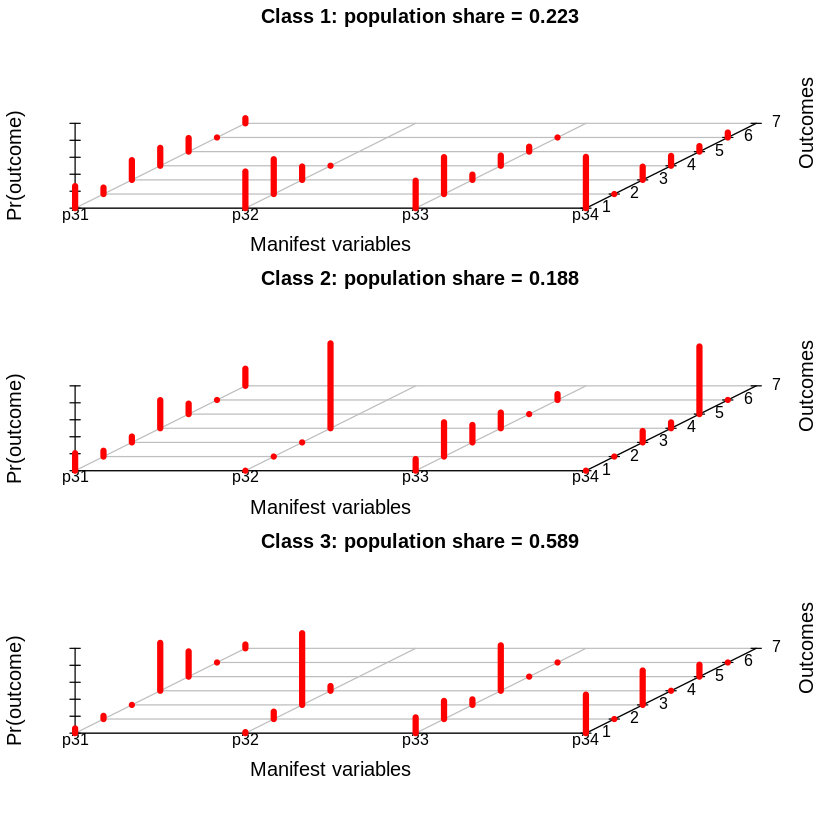

In [57]:
funcion <- poLCA(f_ciudadania, data=data_ciudadania, nclass = 3, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

Ajuste a una clase latente
========================================================= 
Numero de datos: 101 

Numero de parametros estimados: 62

Grados de libertad: 39 

Maxima log-verosimilutd: -558.8194 Es una medida de ajuste del modelo

Coeficiente de Akaike (Mientras más pequeño el AIC es mejor modeelo comparativamente, la comparación sólo es valida entre conjuntos con las mismas variables. Pero es sensible al numero de datos)

AIC(1): 1241.639

Coeficiente BIC (Igual al anterior, es menos sensible a la cantidad de datos, pero en este caso se estanca siempre en 1, este es sensible a los grados de libertad)

BIC(1): 1403.776

G^2(1): 258.3439 (Likelihood ratio/deviance statistic) 

X^2(1): 539.1803 (Chi-square goodness of fit) 

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$p31
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5) Pr(6)  Pr(7)
class 1:  0.0971 0.1799 0.0586 0.3334 0.3310     0 0.0000
class 2:  0.0000 0.0000 0.0000 0.7747 0.0000     0 0.2253
class 3:  0.4114 0.0000 0.3041 0.1873 0.0000     0 0.0972
class 4:  0.1032 0.0000 0.0000 0.4587 0.3865     0 0.0516

$p32
           Pr(1)  Pr(2)  Pr(3)  Pr(4)
class 1:  0.1799 0.1088 0.3951 0.3163
class 2:  0.1326 0.2506 0.3108 0.3060
class 3:  0.1646 0.3951 0.0000 0.4403
class 4:  0.0000 0.0000 1.0000 0.0000

$p33
           Pr(1)  Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.0000 0.7364 0.0000 0.2636 0.0000 0.0000
class 2:  0.0728 0.4392 0.0000 0.3555 0.0663 0.0663
class 3:  0.5760 0.0000 0.3291 0.0949 0.0000 0.0000
class 4:  0.2871 0.0000 0.1090 0.6039 0.0000 0.0000

$p34
           Pr(1) Pr(2)  Pr(3)  Pr(4)  Pr(5)  Pr(6)
class 1:  0.6371     0 0.0000 0.1349 0.2280 0.0000
class 2:  0.0000     0 0.6829 0.0000 0.

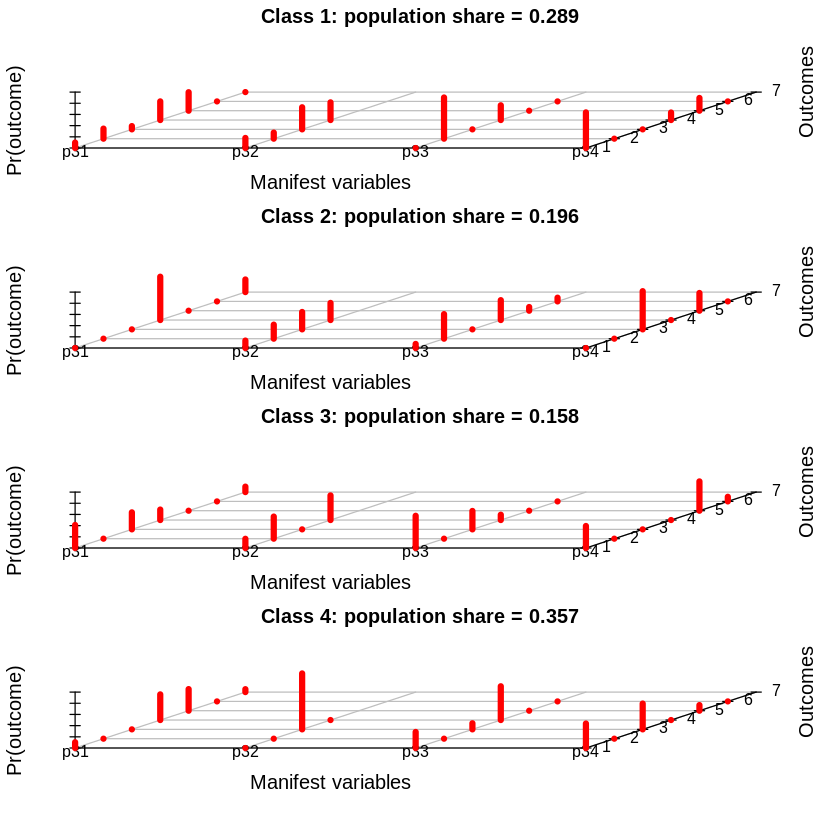

In [58]:
funcion <- poLCA(f_ciudadania, data=data_ciudadania, nclass = 4, maxiter = 1000, graphs = TRUE,
tol = 1e-10, na.rm = TRUE, probs.start = NULL, nrep = 1,
verbose = TRUE, calc.se = TRUE)

Ajuste a una clase latente
========================================================= 
Numero de datos: 101 

Numero de parametros estimados: 83

Grados de libertad: 18 

Maxima log-verosimilutd: -551.6786 Es una medida de ajuste del modelo

Coeficiente de Akaike (Mientras más pequeño el AIC es mejor modeelo comparativamente, la comparación sólo es valida entre conjuntos con las mismas variables. Pero es sensible al numero de datos)

AIC(1): 1269.357

Coeficiente BIC (Igual al anterior, es menos sensible a la cantidad de datos, pero en este caso se estanca siempre en 1, este es sensible a los grados de libertad)

BIC(1): 1486.412

G^2(1): 244.0624 (Likelihood ratio/deviance statistic) 

X^2(1): 2195.424 (Chi-square goodness of fit) 

# Transformación de datos caracteristicos

In [59]:
datos_corregidos$`p1 genero`[datos_corregidos$`p1 genero`=='mujer']<- 1
datos_corregidos$`p1 genero`[datos_corregidos$`p1 genero`=='hombre']<- 2
datos_corregidos$`p1 genero`=as.numeric(datos_corregidos$`p1 genero`)
#datos_corregidos$`p1 genero`

In [60]:
datos_corregidos$`p2 dependencia`[datos_corregidos$`p2 dependencia` == "municipal"] <- 1
datos_corregidos$`p2 dependencia`[datos_corregidos$`p2 dependencia` == "particular"] <- 2
datos_corregidos$`p2 dependencia`[datos_corregidos$`p2 dependencia` == "subvencionado"] <- 3
datos_corregidos$`p2 dependencia`=as.numeric(datos_corregidos$`p2 dependencia`)
#datos_corregidos$`p2 dependencia`

In [61]:
datos_corregidos$`p4 profesion`[datos_corregidos$`p4 profesion` == "basica"] <- 1
datos_corregidos$`p4 profesion`[datos_corregidos$`p4 profesion` == "diferencial"] <- 2
datos_corregidos$`p4 profesion`[datos_corregidos$`p4 profesion` == "media"] <- 3
datos_corregidos$`p4 profesion`[datos_corregidos$`p4 profesion` == "parvulo"] <- 4
datos_corregidos$`p4 profesion`=as.numeric(datos_corregidos$`p4 profesion`)
#datos_corregidos$`p4 profesion`

In [62]:
datos_corregidos$`p5 genero-director`[datos_corregidos$`p5 genero-director`=='mujer']<- 1
datos_corregidos$`p5 genero-director`[datos_corregidos$`p5 genero-director`=='hombre']<- 2
datos_corregidos$`p5 genero-director`=as.numeric(datos_corregidos$`p5 genero-director`)
#datos_corregidos$`p5 genero-director`

In [63]:
datos_corregidos$`p6 genero-utp`[datos_corregidos$`p6 genero-utp`=='mujer']<- 1
datos_corregidos$`p6 genero-utp`[datos_corregidos$`p6 genero-utp`=='hombre']<- 2
datos_corregidos$`p6 genero-utp`=as.numeric(datos_corregidos$`p6 genero-utp`)
#datos_corregidos$`p6 genero-utp`

In [64]:
datos_corregidos$`p7genero-inspector`[datos_corregidos$`p7genero-inspector`=='mujer']<- 1
datos_corregidos$`p7genero-inspector`[datos_corregidos$`p7genero-inspector`=='hombre']<- 2
datos_corregidos$`p7genero-inspector`=as.numeric(datos_corregidos$`p7genero-inspector`)
#datos_corregidos$`p7genero-inspector`

# Analisis Factorial para data ordinal

In [65]:
library(psych)
load("polychoric")

# Liderazgo autoritario

In [66]:
data_LA=datos_corregidos[,8:17]
names(data_LA)=c('p8','p9','p10','p11','p12','p13','p14','p15','p16','p17')
des_LA = describe(data_LA)

In [67]:
knitr::kable(des_LA[,c("min", "max", "mean", "median", "skew", "kurtosis")], main = "Data Summary")



|    | min| max|     mean| median|       skew|   kurtosis|
|:---|---:|---:|--------:|------:|----------:|----------:|
|p8  |   1|   4| 3.267327|      3| -0.5878327| -0.2258755|
|p9  |   1|   4| 3.158416|      3| -0.6810840| -0.4258163|
|p10 |   1|   4| 3.326733|      4| -0.7567251| -0.6208793|
|p11 |   1|   4| 2.762376|      3| -0.0878248| -0.8277658|
|p12 |   1|   4| 2.475248|      3| -0.0613560| -0.7120675|
|p13 |   1|   4| 2.069307|      2|  0.5060337| -0.6918753|
|p14 |   1|   4| 1.861386|      2|  0.9267139| -0.1746832|
|p15 |   1|   4| 1.910891|      2|  0.7728314| -0.1097034|
|p16 |   1|   4| 2.396040|      2|  0.1163736| -1.1821349|
|p17 |   1|   4| 1.920792|      2|  0.7391513|  0.0242437|

In [68]:
poly_cor_LA = polychoric(data_LA)
rho_LA = poly_cor_LA$rho
#save(rho_LA, file = "polychoric")
### Thresholds/Scaling results
poly_cor_LA$tau

,1,2,3
p8,-2.3300789,-1.13249653,0.23799988
p9,-1.7553005,-0.77957077,0.21254334
p10,-2.3300789,-0.92217818,-0.03723576
p11,-1.5597800,-0.26361161,0.77957077
p12,-1.0865681,-0.01240937,1.23234086
p13,-0.4765770,0.53296269,1.34626267
p14,-0.1369262,0.81365681,1.28721373
p15,-0.3415717,0.81365681,1.48097265
p16,-0.7139671,0.11191464,0.92217818
p17,-0.4216681,0.84871553,1.55977999


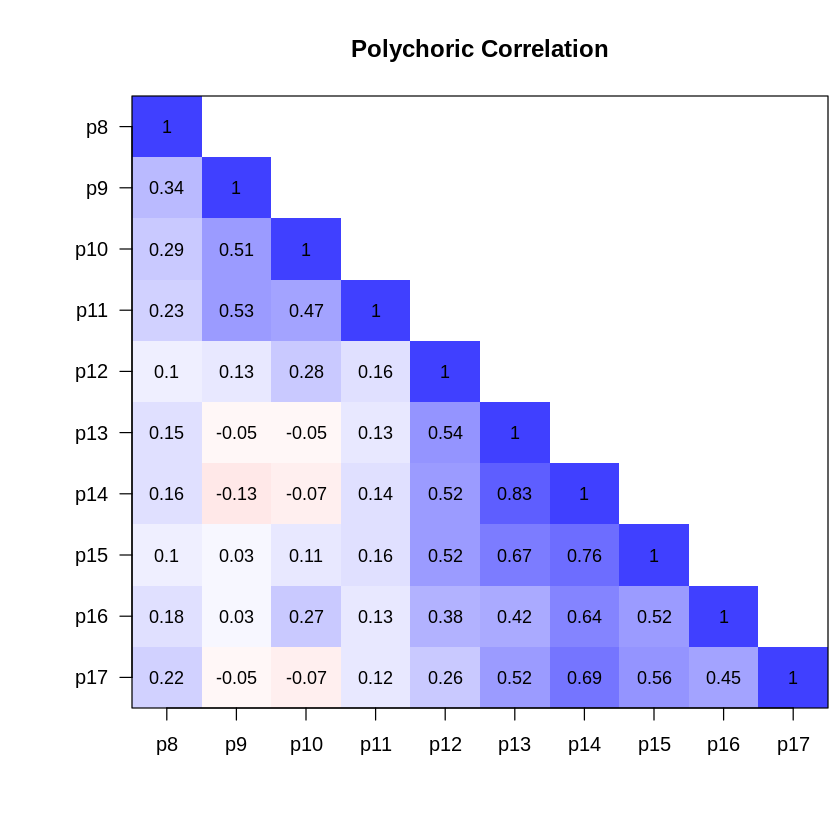

In [69]:
cor.plot(rho_LA, numbers=T, upper=FALSE, main = "Polychoric Correlation", show.legend = FALSE)

## Test KMO

In [70]:
KMO(rho_LA)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = rho_LA)
Overall MSA =  0.73
MSA for each item = 
  p8   p9  p10  p11  p12  p13  p14  p15  p16  p17 
0.65 0.64 0.53 0.58 0.82 0.80 0.67 0.88 0.68 0.88 

Parallel analysis suggests that the number of factors =  2  and the number of components =  NA 


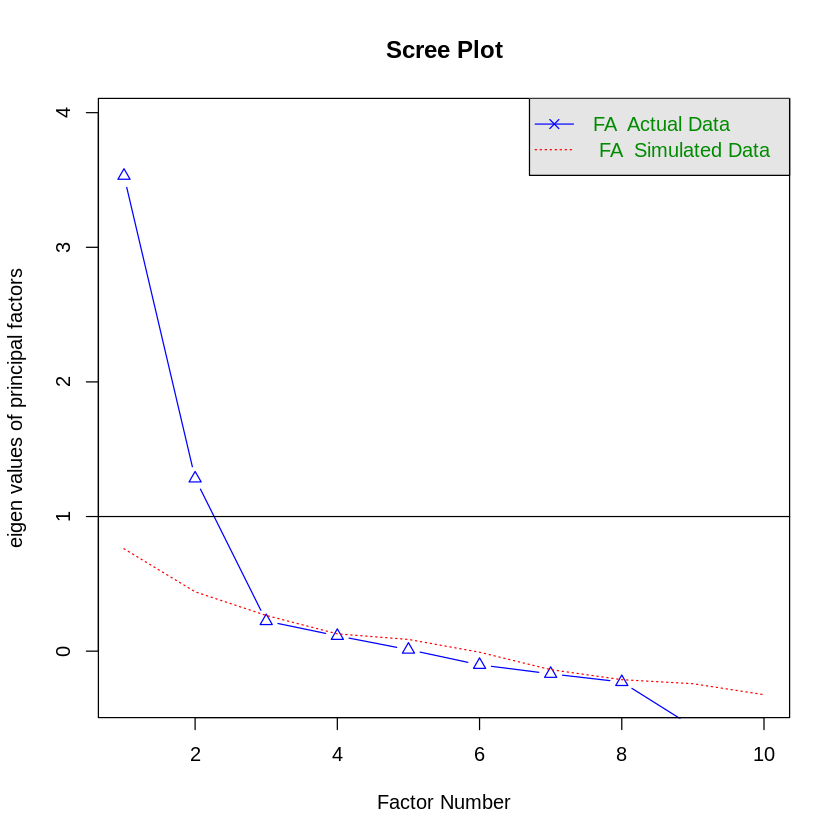

In [71]:
fa.parallel(rho_LA, fm="pa", fa="fa", main = "Scree Plot",n.iter=2,n.obs=102)

## Caso 1 cluster.

In [159]:
# Polychoric factor analysis
poly_model_LA = fa(data_LA, nfactor=1, cor="poly", fm="mle", rotate = "none")
poly_model_LA$loading


Loadings:
    ML1   
p8   0.165
p9  -0.124
p10       
p11  0.146
p12  0.529
p13  0.831
p14  0.992
p15  0.767
p16  0.644
p17  0.692

                 ML1
SS loadings    3.505
Proportion Var 0.350

# Sugerido por el algoritmo
## Caso 2 clusters.

In [73]:
# Polychoric factor analysis
poly_model_LA = fa(data_LA, nfactor=2, cor="poly", fm="mle", rotate = "none")
poly_model_LA$loading


Loadings:
    ML1    ML2   
p8   0.162  0.383
p9  -0.131  0.700
p10         0.802
p11  0.144  0.610
p12  0.523  0.306
p13  0.827       
p14  0.997       
p15  0.761  0.174
p16  0.643  0.252
p17  0.690       

                 ML1   ML2
SS loadings    3.492 1.841
Proportion Var 0.349 0.184
Cumulative Var 0.349 0.533

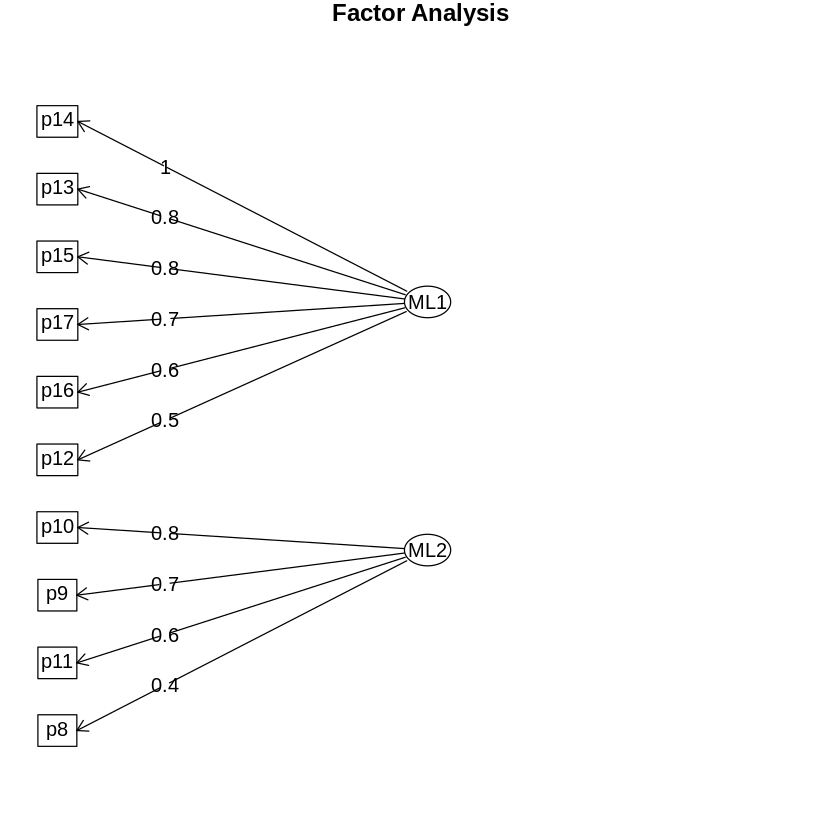

In [74]:
fa.diagram(poly_model_LA)

## Caso 3 clusters.

In [75]:
# Polychoric factor analysis
poly_model_LA = fa(data_LA, nfactor=3, cor="poly", fm="mle", rotate = "none")
poly_model_LA$loadings


Loadings:
    ML1    ML3    ML2   
p8   0.187  0.379       
p9          0.734 -0.203
p10  0.122  0.659 -0.414
p11  0.150  0.665       
p12  0.493  0.292  0.181
p13  0.677  0.108  0.498
p14  0.894         0.443
p15  0.698  0.170  0.305
p16  0.915        -0.396
p17  0.624         0.294

                 ML1   ML3   ML2
SS loadings    3.289 1.685 1.027
Proportion Var 0.329 0.168 0.103
Cumulative Var 0.329 0.497 0.600

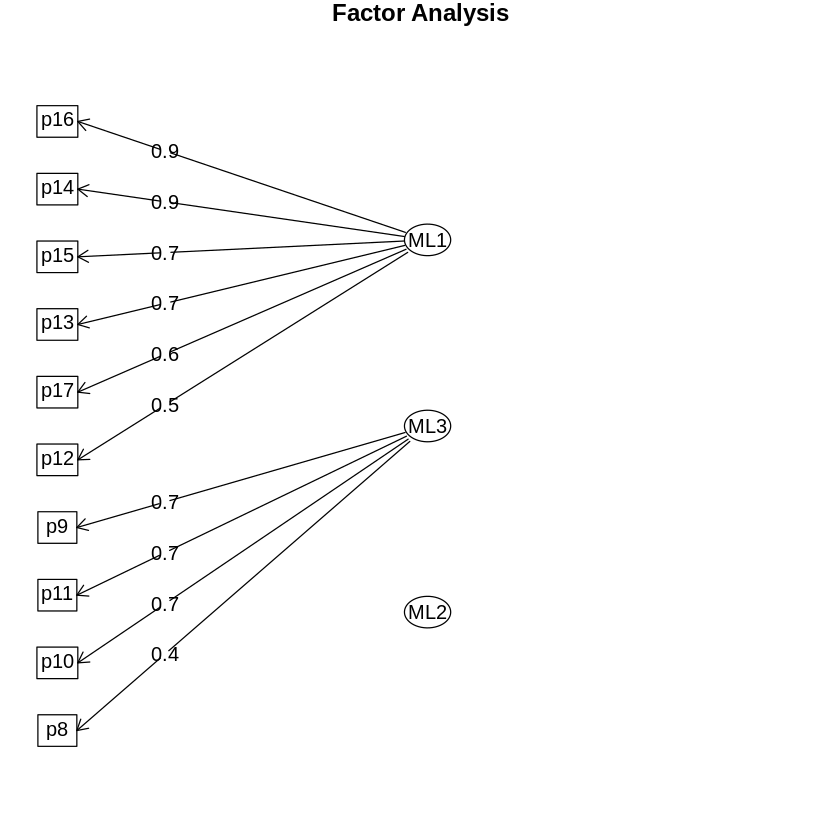

In [76]:
fa.diagram(poly_model_LA)

# Formación minimalista

In [77]:
data_FM = datos_corregidos[,18:20]
names(data_FM)=c('p18','P19','p20')
des_FM = describe(data_FM)

In [78]:
knitr::kable(des_FM[,c("min", "max", "mean", "median", "skew", "kurtosis")], main = "Data Summary")



|    | min| max|     mean| median|       skew|   kurtosis|
|:---|---:|---:|--------:|------:|----------:|----------:|
|p18 |   1|   4| 2.970297|      3| -0.6270447| -0.5561803|
|P19 |   1|   4| 2.990099|      3| -0.7426215| -0.6895873|
|p20 |   1|   4| 2.633663|      3| -0.2241618| -1.2017605|

In [79]:
poly_cor_FM = polychoric(data_FM)
rho_FM = poly_cor_FM$rho
#save(rho_LA, file = "polychoric")
### Thresholds/Scaling results
poly_cor_FM$tau

,1,2,3
p18,-1.2872137,-0.6209182,0.4216681
P19,-1.0428242,-0.6513021,0.2636116
p20,-0.8487155,-0.2125433,0.6822996


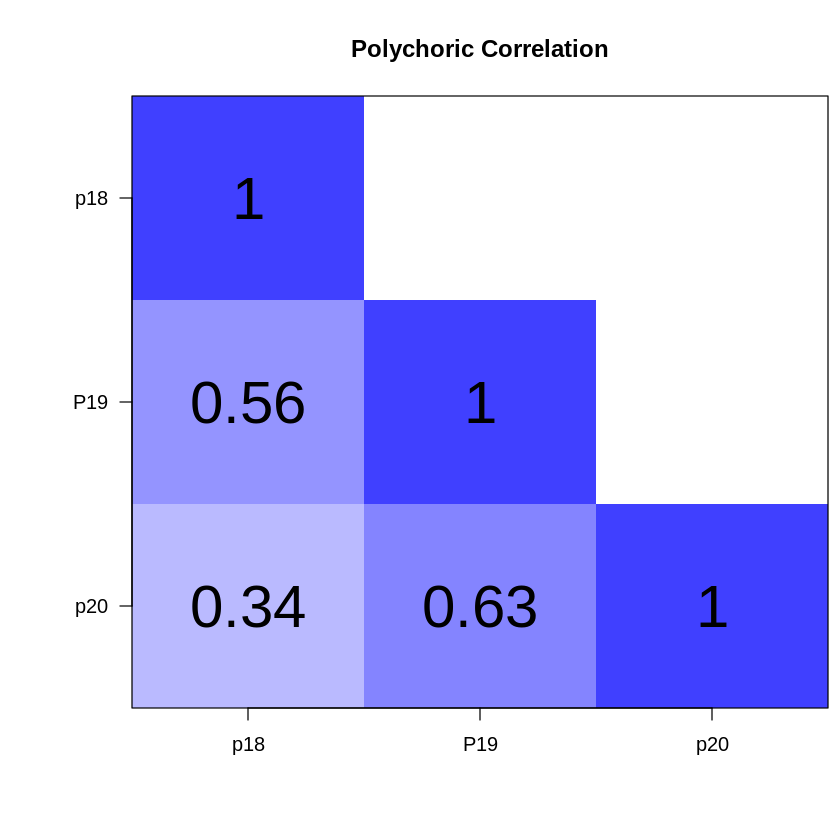

In [80]:
cor.plot(rho_FM, numbers=T, upper=FALSE, main = "Polychoric Correlation", show.legend = FALSE)

## Test KMO

In [81]:
KMO(rho_FM)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = rho_FM)
Overall MSA =  0.6
MSA for each item = 
 p18  P19  p20 
0.66 0.57 0.62 

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“An ultra-Heywood case was detected.  Examine the results carefully”


Parallel analysis suggests that the number of factors =  1  and the number of components =  NA 


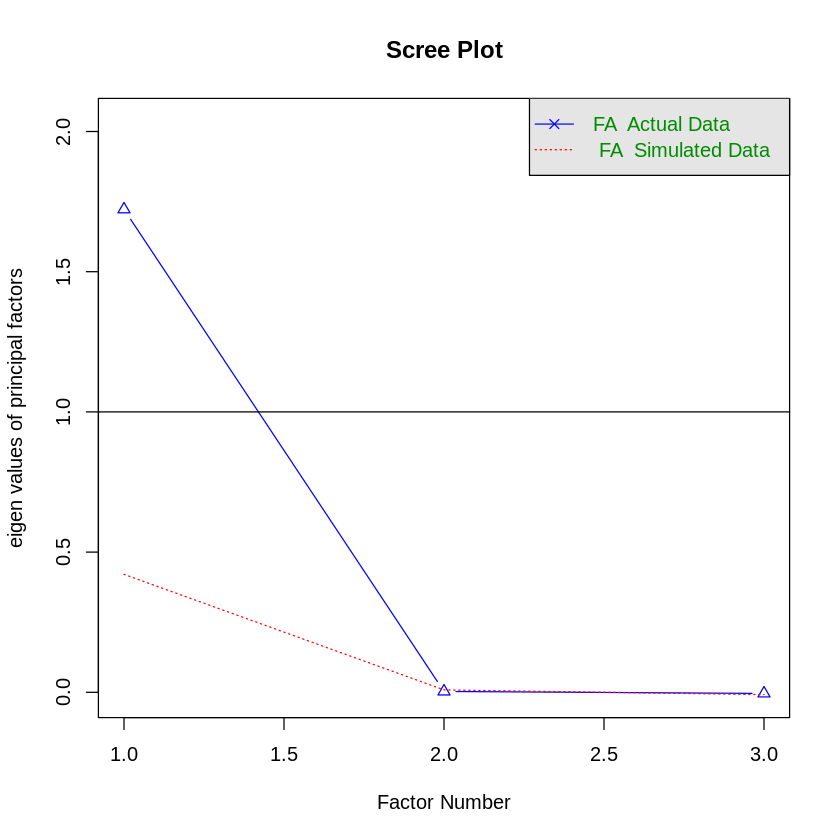

In [82]:
fa.parallel(rho_FM, fm="pa", fa="fa", main = "Scree Plot",n.iter=2,n.obs=102)

# Caso sugerido por el algoritmo

## Caso 1 cluster.

In [83]:
# Polychoric factor analysis
poly_model_FM = fa(data_FM, nfactor=1, cor="poly", fm="mle", rotate = "none")
poly_model_FM$loading


Loadings:
    ML1  
p18 0.564
P19 0.997
p20 0.635

                 ML1
SS loadings    1.717
Proportion Var 0.572

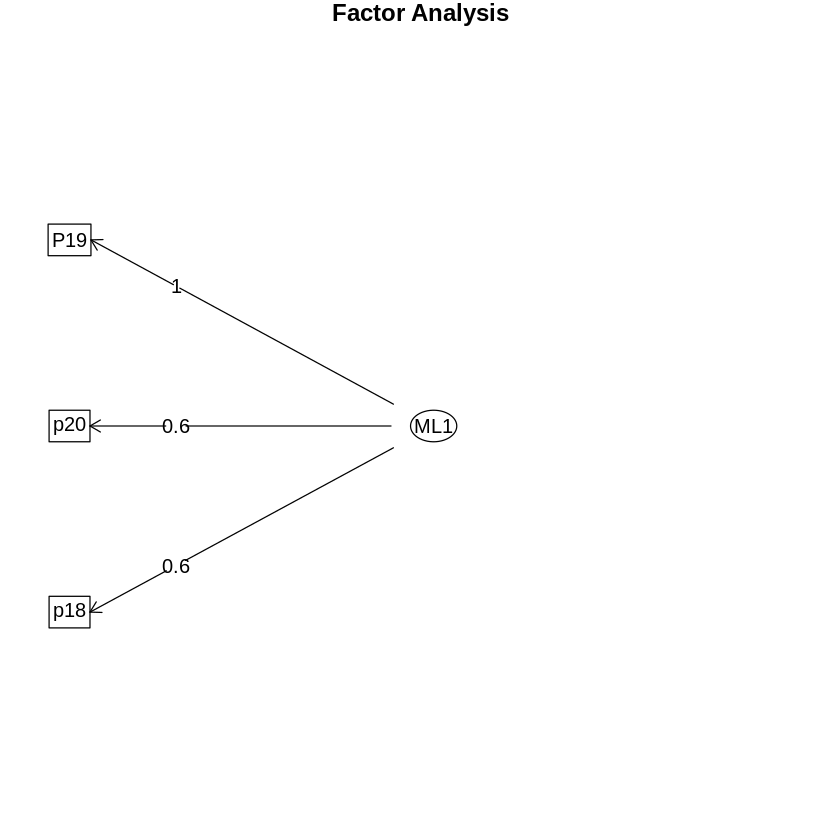

In [84]:
fa.diagram(poly_model_FM)

## Caso 2 clusters.

In [85]:
# Polychoric factor analysis
poly_model_FM = fa(data_FM, nfactor=2, cor="poly", fm="mle", rotate = "none")
poly_model_FM$loading


Loadings:
    ML1    ML2   
p18  0.653  0.422
P19  0.858       
p20  0.741 -0.331

                 ML1   ML2
SS loadings    1.712 0.288
Proportion Var 0.571 0.096
Cumulative Var 0.571 0.667

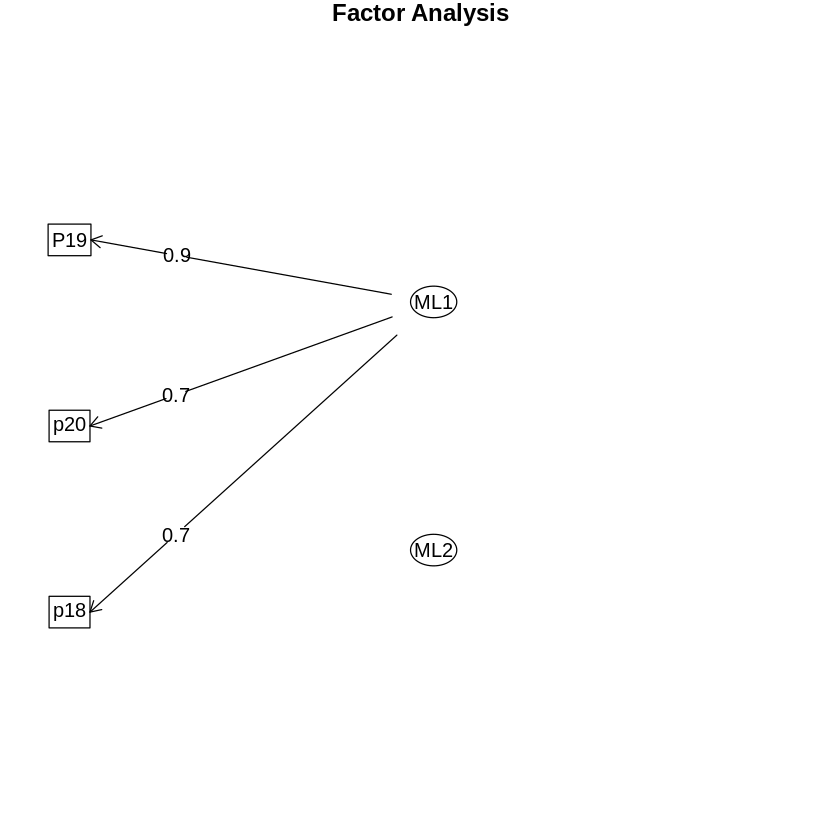

In [86]:
fa.diagram(poly_model_FM)

## Caso 3 clusters.

In [87]:
# Polychoric factor analysis
poly_model_FM = fa(data_FM, nfactor=3, cor="poly", fm="mle", rotate = "none")
poly_model_FM$loading


Loadings:
    ML1    ML2    ML3   
p18  0.609              
P19  0.797              
p20  0.687              

                 ML1   ML2   ML3
SS loadings    1.478 0.013 0.000
Proportion Var 0.493 0.004 0.000
Cumulative Var 0.493 0.497 0.497

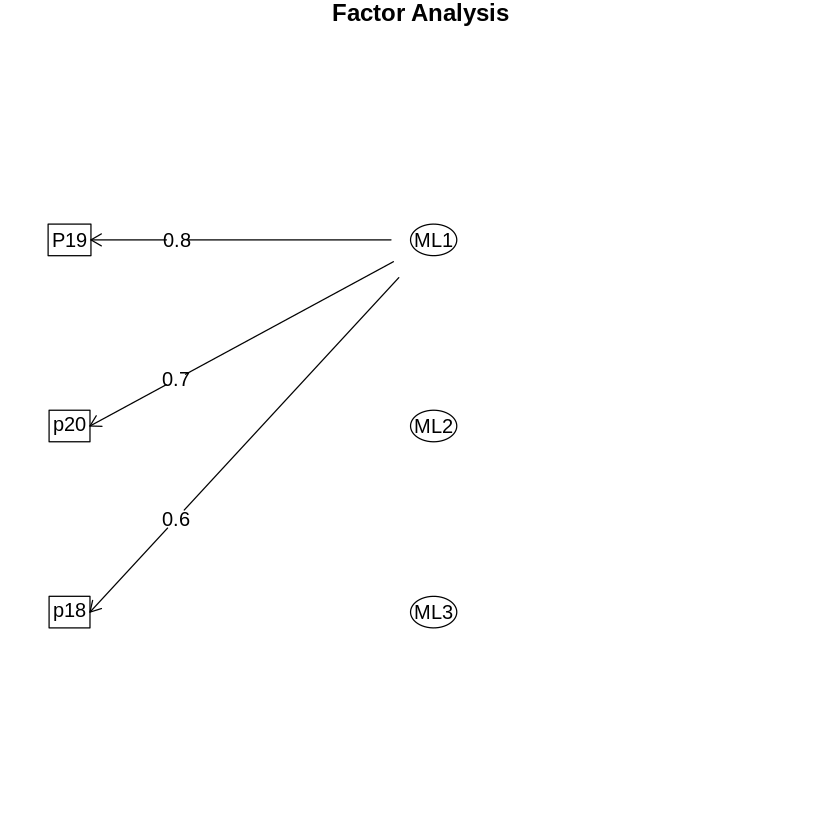

In [88]:
fa.diagram(poly_model_FM)

# Liderazgo Democratico

In [89]:
names(data_LD)=c('p25','P26','p37','p38','p39','p40','p41','p42')
des_LD = describe(data_LD)

In [90]:
knitr::kable(des_LD[,c("min", "max", "mean", "median", "skew", "kurtosis")], main = "Data Summary")



|    | min| max|     mean| median|       skew|   kurtosis|
|:---|---:|---:|--------:|------:|----------:|----------:|
|p25 |   1|   4| 2.891089|      3| -0.6016303| -0.2064549|
|P26 |   1|   4| 3.544554|      4| -1.7465161|  2.2876762|
|p37 |   1|   4| 3.475248|      4| -1.2865060|  1.6673820|
|p38 |   1|   4| 3.297030|      3| -0.9259637|  0.2213116|
|p39 |   1|   4| 3.485149|      4| -1.1636441|  0.4968490|
|p40 |   1|   4| 3.386139|      3| -0.8277772|  0.2775274|
|p41 |   1|   4| 3.217822|      3| -0.6504721| -0.1485157|
|p42 |   1|   4| 3.346535|      4| -1.0856894|  0.1450966|

In [91]:
poly_cor_LD = polychoric(data_LD)
rho_LD = poly_cor_LD$rho
#save(rho_LA, file = "polychoric")
### Thresholds/Scaling results
poly_cor_LD$tau

,1,2,3
p25,-1.346263,-0.6513021,0.71396710
P26,-1.755301,-1.2323409,-0.50456929
p37,-2.057856,-1.4809727,-0.16202378
p38,-1.885177,-1.0428242,0.06208512
p39,-2.330079,-1.2323409,-0.26361161
p40,-2.330079,-1.3462627,0.03723576
p41,-2.057856,-1.0009899,0.26361161
p42,-1.755301,-0.9221782,-0.16202378


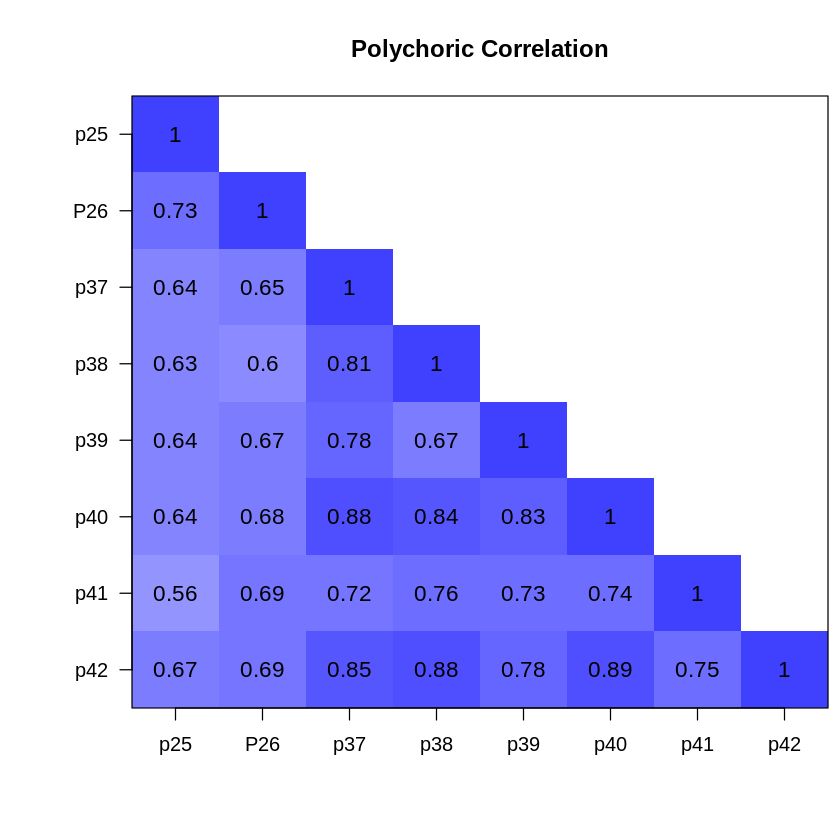

In [92]:
cor.plot(rho_LD, numbers=T, upper=FALSE, main = "Polychoric Correlation", show.legend = FALSE)

## Test KMO

In [93]:
KMO(rho_LD)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = rho_LD)
Overall MSA =  0.89
MSA for each item = 
 p25  P26  p37  p38  p39  p40  p41  p42 
0.87 0.87 0.95 0.85 0.88 0.89 0.88 0.93 

Parallel analysis suggests that the number of factors =  1  and the number of components =  NA 


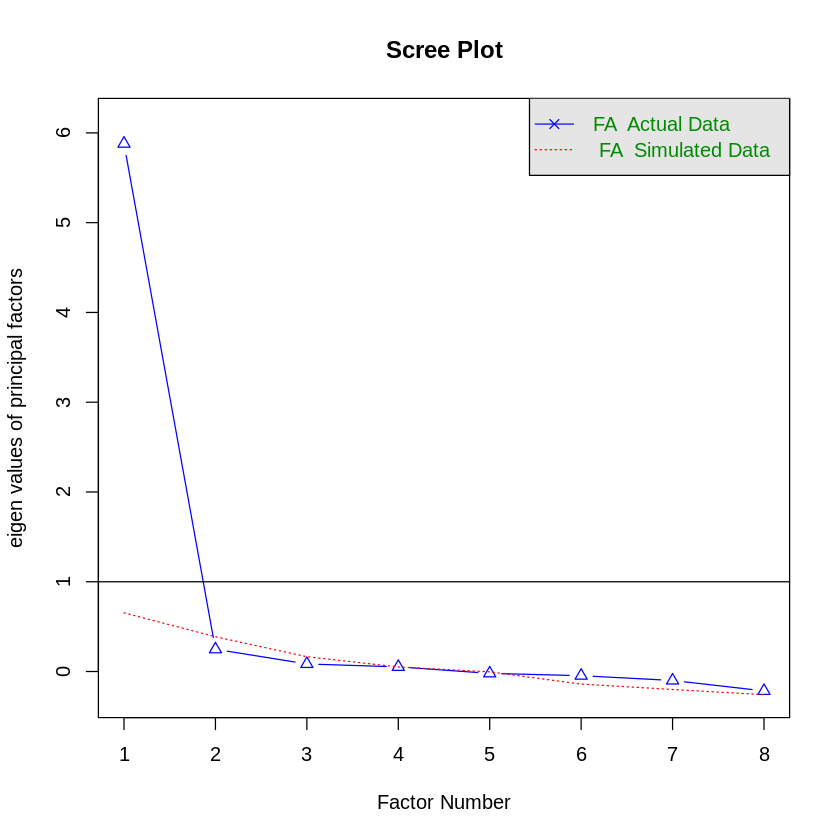

In [94]:
fa.parallel(rho_LD, fm="pa", fa="fa", main = "Scree Plot",n.iter=1,n.obs=102)

# Sugerido por el test
## Caso 1 cluster.

In [95]:
# Polychoric factor analysis
poly_model_LD = fa(data_LD, nfactor=1, cor="poly", fm="mle", rotate = "none")
poly_model_LD$loading


Loadings:
    ML1  
p25 0.710
P26 0.738
p37 0.913
p38 0.895
p39 0.845
p40 0.949
p41 0.809
p42 0.945

                 ML1
SS loadings    5.845
Proportion Var 0.731

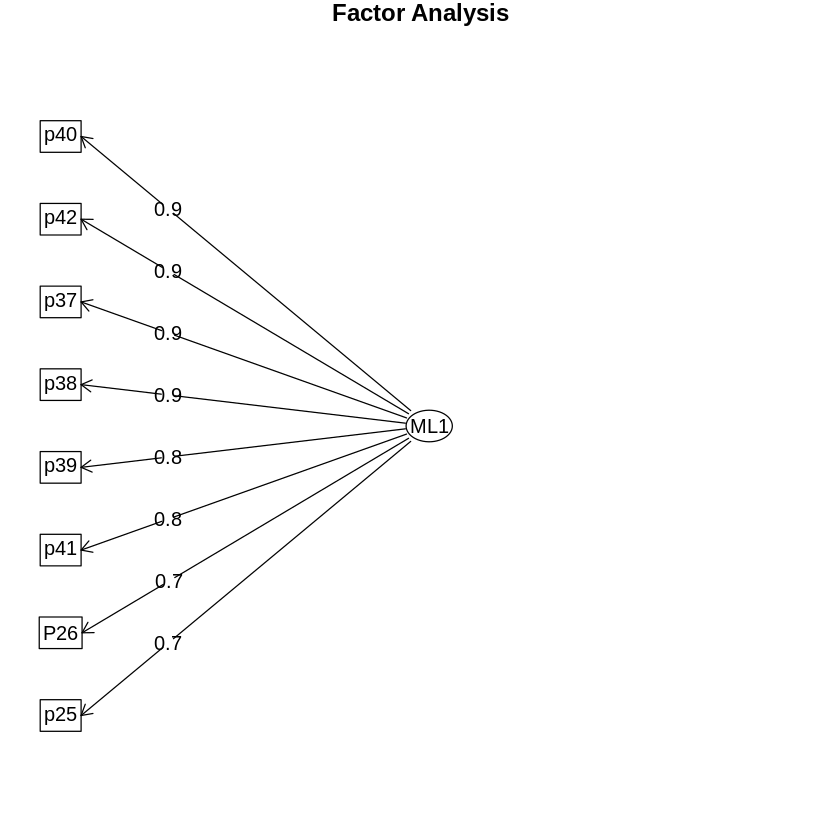

In [96]:
fa.diagram(poly_model_LD)

## Caso 2 clusters.

In [97]:
# Polychoric factor analysis
poly_model_LD = fa(data_LD, nfactor=2, cor="poly", fm="mle", rotate = "none")
poly_model_LD$loading


Loadings:
    ML1    ML2   
p25  0.748  0.184
P26  0.994       
p37  0.698  0.591
p38  0.657  0.622
p39  0.709  0.453
p40  0.736  0.600
p41  0.727  0.379
p42  0.738  0.593

                 ML1   ML2
SS loadings    4.585 1.837
Proportion Var 0.573 0.230
Cumulative Var 0.573 0.803

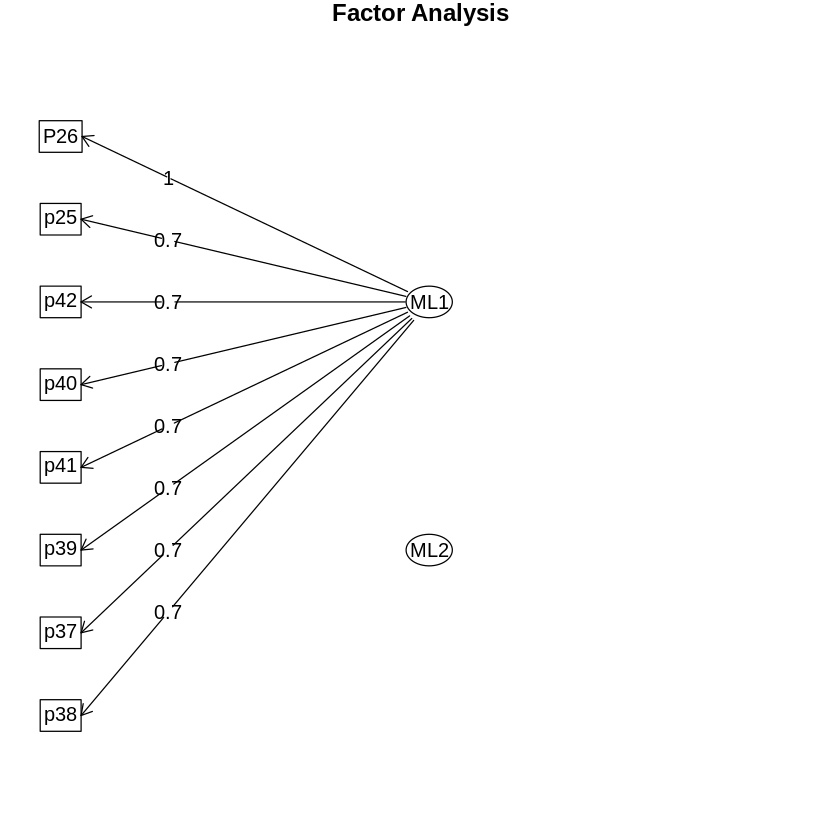

In [98]:
fa.diagram(poly_model_LD)

## Caso 3 clusters.

In [99]:
# Polychoric factor analysis
poly_model_LD = fa(data_LD, nfactor=3, cor="poly", fm="mle", rotate = "none")
poly_model_LD$loading


Loadings:
    ML1    ML3    ML2   
p25  0.759        -0.127
P26  0.886        -0.459
p37  0.832  0.336  0.183
p38  0.901         0.426
p39  0.762  0.462       
p40  0.870  0.366  0.174
p41  0.817  0.105       
p42  0.890  0.224  0.212

                 ML1   ML3   ML2
SS loadings    5.661 0.527 0.521
Proportion Var 0.708 0.066 0.065
Cumulative Var 0.708 0.773 0.839

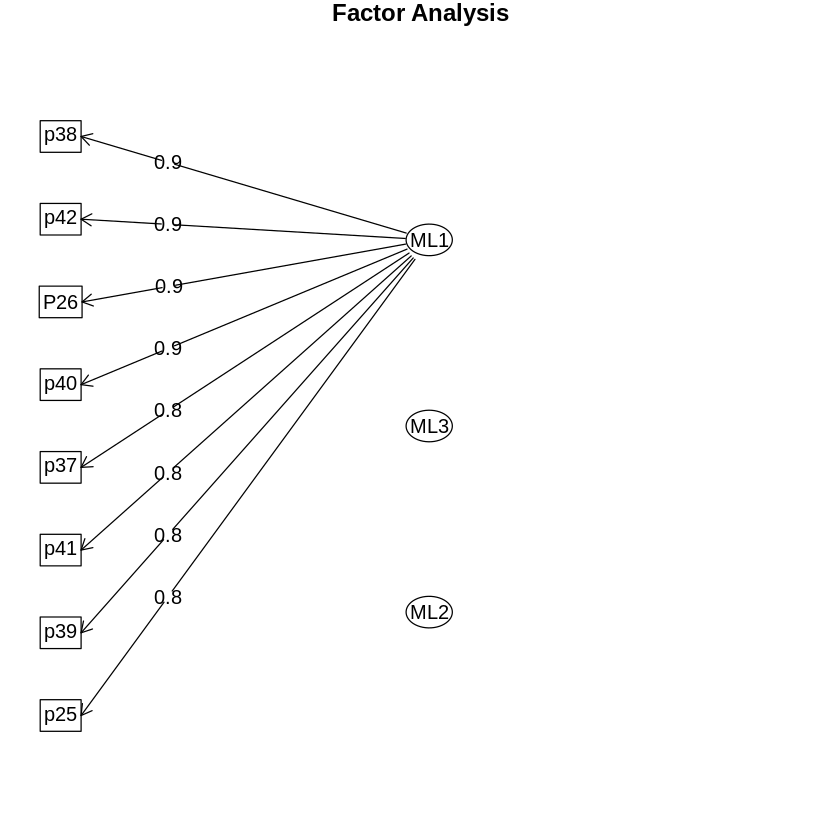

In [100]:
fa.diagram(poly_model_LD)

# Caso raro que no recomiendo considerar

## Caso 4 clusters.

In [101]:
# Polychoric factor analysis
poly_model_LD = fa(data_LD, nfactor=4, cor="poly", fm="mle", rotate = "none")
poly_model_LD$loading


Loadings:
    ML1    ML4    ML2    ML3   
p25  0.818        -0.566       
P26  0.770  0.147 -0.153 -0.204
p37  0.843  0.319         0.121
p38  0.918         0.171  0.350
p39  0.788  0.407        -0.119
p40  0.862  0.412         0.151
p41  0.886         0.335 -0.312
p42  0.891  0.232         0.180

                 ML1   ML4   ML2   ML3
SS loadings    5.756 0.514 0.503 0.351
Proportion Var 0.720 0.064 0.063 0.044
Cumulative Var 0.720 0.784 0.847 0.891

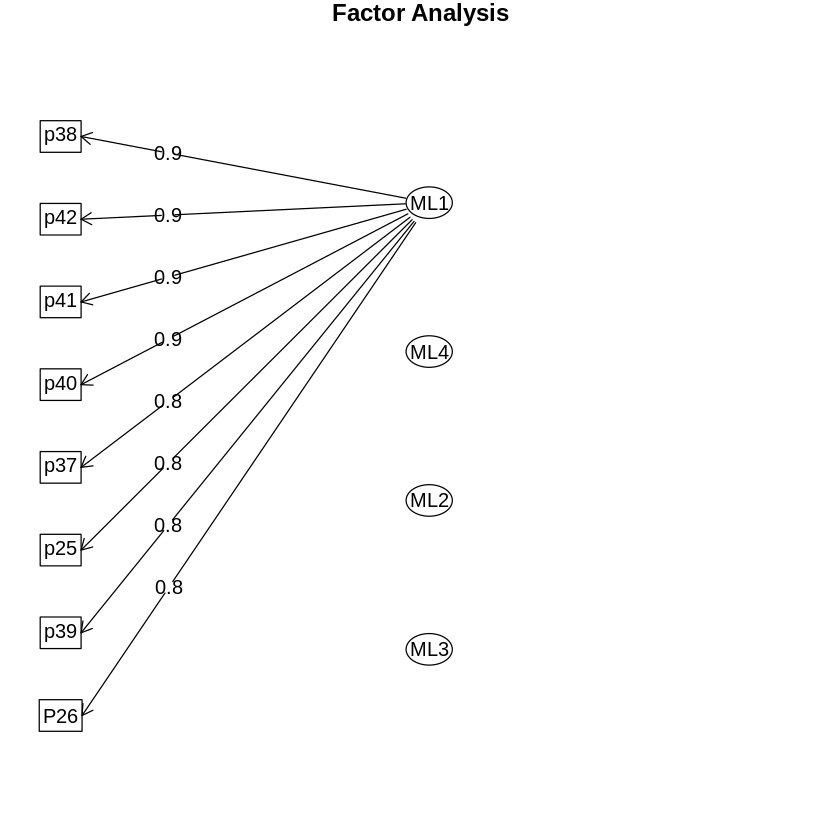

In [102]:
fa.diagram(poly_model_LD)

# Trabajo propuesto post revisión.

In [103]:
library(QuantPsyc)
library(boot)
library(dplyr)

Loading required package: boot


Attaching package: ‘boot’


The following object is masked from ‘package:psych’:

    logit



Attaching package: ‘QuantPsyc’


The following object is masked from ‘package:base’:

    norm




In [141]:
data_ordinal<-bind_cols(data_LA,data_FM,data_LD) #agrupamos todos los datos ordinales

In [105]:
mult.norm(data_LD)$mult.test

,Beta-hat,kappa,p-val
Skewness,37.29225,627.7529,0
Kurtosis,124.81590,17.8034,0


In [106]:
mult.norm(data_FM)$mult.test

,Beta-hat,kappa,p-val
Skewness,1.743043,29.34122,0.001096971
Kurtosis,16.796869,1.64849,0.099252104


In [107]:
mult.norm(data_LA)$mult.test

In [147]:
mult.norm(data_ordinal)$mult.test

,Beta-hat,kappa,p-val
Skewness,152.5606,2568.103715,0.000000e+00
Kurtosis,520.7722,6.106805,1.016455e-09


In [109]:
library(MVN)
library(energy)

In [110]:
mvnorm.etest(data_LD, R=100)


	Energy test of multivariate normality: estimated parameters

data:  x, sample size 101, dimension 8, replicates 100
E-statistic = 9.9336, p-value < 2.2e-16


In [111]:
mvnorm.etest(data_FM, R=100)


	Energy test of multivariate normality: estimated parameters

data:  x, sample size 101, dimension 3, replicates 100
E-statistic = 4.014, p-value < 2.2e-16


In [149]:
mvnorm.etest(data_LA, R=100)


	Energy test of multivariate normality: estimated parameters

data:  x, sample size 101, dimension 10, replicates 100
E-statistic = 2, p-value < 2.2e-16


In [148]:
mvnorm.etest(data_ordinal, R=100)


	Energy test of multivariate normality: estimated parameters

data:  x, sample size 101, dimension 21, replicates 100
E-statistic = 2.9348, p-value < 2.2e-16


In [141]:
data_ordinal<-bind_cols(data_LA,data_FM,data_LD) #agrupamos todos los datos ordinales

In [145]:
des_ord = describe(data_ordinal)

In [146]:
knitr::kable(des_ord[,c("min", "max", "mean", "median", "skew", "kurtosis")], main = "Data Summary")



|    | min| max|     mean| median|       skew|   kurtosis|
|:---|---:|---:|--------:|------:|----------:|----------:|
|p8  |   1|   4| 3.267327|      3| -0.5878327| -0.2258755|
|p9  |   1|   4| 3.158416|      3| -0.6810840| -0.4258163|
|p10 |   1|   4| 3.326733|      4| -0.7567251| -0.6208793|
|p11 |   1|   4| 2.762376|      3| -0.0878248| -0.8277658|
|p12 |   1|   4| 2.475248|      3| -0.0613560| -0.7120675|
|p13 |   1|   4| 2.069307|      2|  0.5060337| -0.6918753|
|p14 |   1|   4| 1.861386|      2|  0.9267139| -0.1746832|
|p15 |   1|   4| 1.910891|      2|  0.7728314| -0.1097034|
|p16 |   1|   4| 2.396040|      2|  0.1163736| -1.1821349|
|p17 |   1|   4| 1.920792|      2|  0.7391513|  0.0242437|
|p18 |   1|   4| 2.970297|      3| -0.6270447| -0.5561803|
|P19 |   1|   4| 2.990099|      3| -0.7426215| -0.6895873|
|p20 |   1|   4| 2.633663|      3| -0.2241618| -1.2017605|
|p25 |   1|   4| 2.891089|      3| -0.6016303| -0.2064549|
|P26 |   1|   4| 3.544554|      4| -1.7465161|  2.2876

In [150]:
poly_cor_ord = polychoric(data_ordinal)
rho_ord = poly_cor_ord$rho
#save(rho_ord, file = "polychoric")
### Thresholds/Scaling results
poly_cor_ord$tau

Warning message in cor.smooth(mat):
“Matrix was not positive definite, smoothing was done”


,1,2,3
p8,-2.3300789,-1.13249653,0.23799988
p9,-1.7553005,-0.77957077,0.21254334
p10,-2.3300789,-0.92217818,-0.03723576
p11,-1.5597800,-0.26361161,0.77957077
p12,-1.0865681,-0.01240937,1.23234086
p13,-0.4765770,0.53296269,1.34626267
p14,-0.1369262,0.81365681,1.28721373
p15,-0.3415717,0.81365681,1.48097265
p16,-0.7139671,0.11191464,0.92217818
p17,-0.4216681,0.84871553,1.55977999


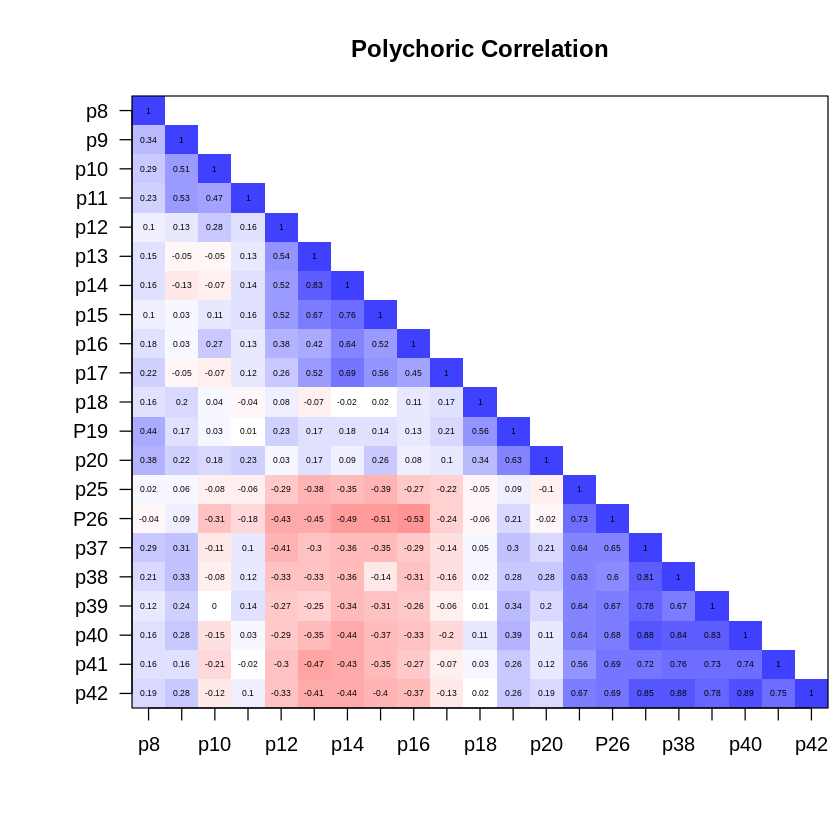

In [151]:
cor.plot(rho_ord, numbers=T, upper=FALSE, main = "Polychoric Correlation", show.legend = FALSE)

## Test KMO

In [152]:
KMO(rho_ord)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = rho_ord)
Overall MSA =  0.13
MSA for each item = 
  p8   p9  p10  p11  p12  p13  p14  p15  p16  p17  p18  P19  p20  p25  P26  p37 
0.05 0.06 0.05 0.04 0.10 0.13 0.16 0.13 0.10 0.08 0.03 0.08 0.05 0.15 0.19 0.20 
 p38  p39  p40  p41  p42 
0.19 0.18 0.21 0.18 0.21 

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”


Parallel analysis suggests that the number of factors =  4  and the number of components =  NA 


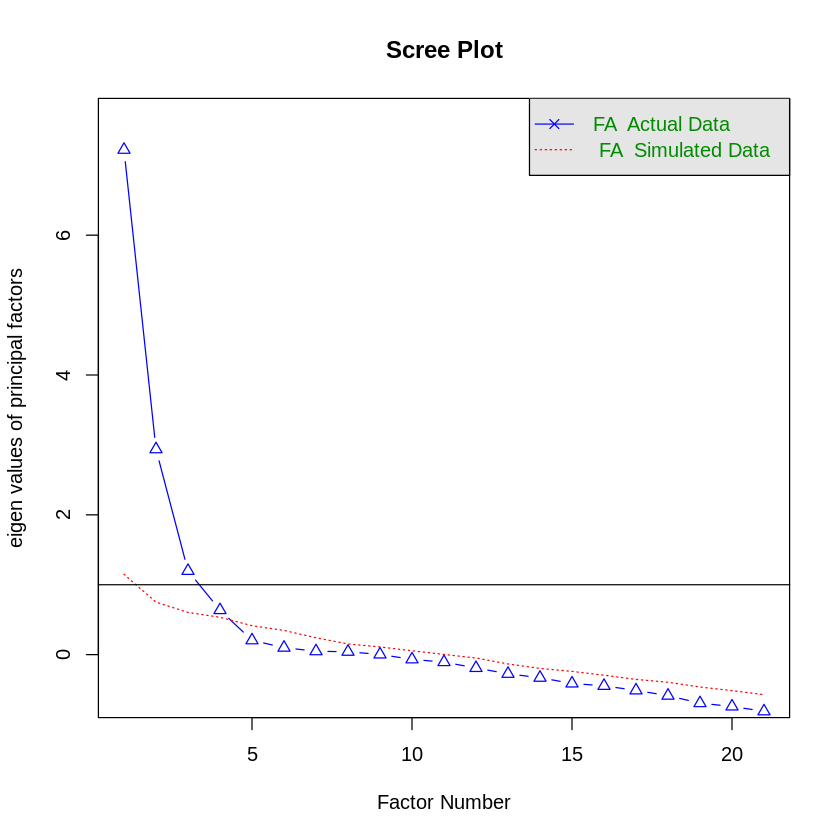

In [155]:
fa.parallel(rho_ord, fm="pa", fa="fa", main = "Scree Plot",n.iter=2,n.obs=102)

## Caso 1 cluster.

In [157]:
# Polychoric factor analysis
poly_model_ord = fa(data_ordinal, nfactor=1, cor="poly", fm="mle", rotate = "none")
poly_model_ord$loading

Warning message in cor.smooth(mat):
“Matrix was not positive definite, smoothing was done”



Loadings:
    ML1   
p8   0.182
p9   0.283
p10 -0.132
p11       
p12 -0.380
p13 -0.429
p14 -0.484
p15 -0.410
p16 -0.384
p17 -0.198
p18       
P19  0.312
p20  0.168
p25  0.711
P26  0.752
p37  0.911
p38  0.889
p39  0.839
p40  0.945
p41  0.812
p42  0.945

                 ML1
SS loadings    7.019
Proportion Var 0.334

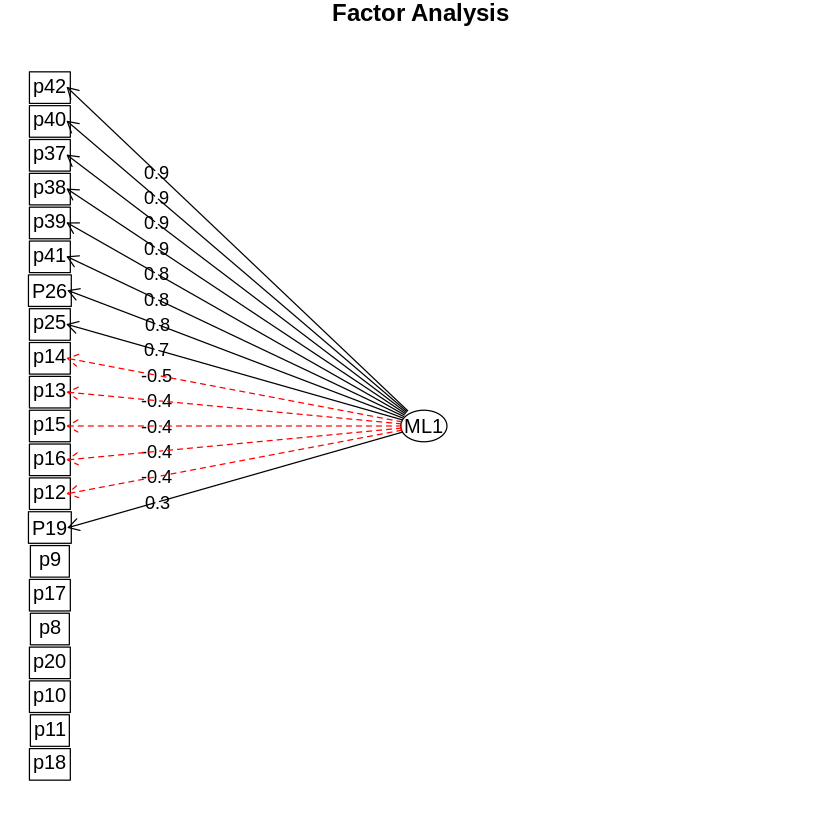

In [158]:
fa.diagram(poly_model_ord)

## Caso 2 cluster.

In [160]:
# Polychoric factor analysis
poly_model_ord = fa(data_ordinal, nfactor=2, cor="poly", fm="mle", rotate = "none")
poly_model_ord$loading

Warning message in cor.smooth(mat):
“Matrix was not positive definite, smoothing was done”



Loadings:
    ML1    ML2   
p8   0.126  0.385
p9   0.268  0.169
p10 -0.113       
p11         0.256
p12 -0.451  0.371
p13 -0.554  0.639
p14 -0.625  0.707
p15 -0.527  0.619
p16 -0.471  0.450
p17 -0.316  0.632
p18         0.103
P19  0.239  0.496
p20  0.120  0.357
p25  0.707       
P26  0.772       
p37  0.881  0.254
p38  0.856  0.268
p39  0.810  0.240
p40  0.924  0.208
p41  0.807  0.107
p42  0.927  0.185

                 ML1   ML2
SS loadings    7.299 2.949
Proportion Var 0.348 0.140
Cumulative Var 0.348 0.488

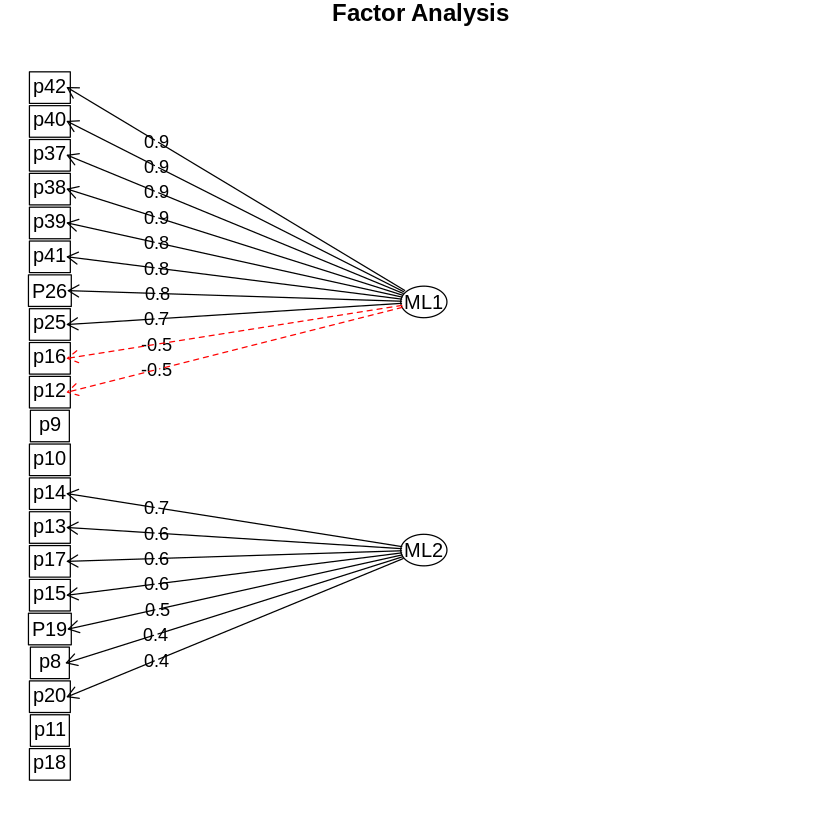

In [161]:
fa.diagram(poly_model_ord)

## Caso 3 cluster.

In [162]:
# Polychoric factor analysis
poly_model_ord = fa(data_ordinal, nfactor=3, cor="poly", fm="mle", rotate = "none")
poly_model_ord$loading

Warning message in cor.smooth(mat):
“Matrix was not positive definite, smoothing was done”



Loadings:
    ML1    ML2    ML3   
p8   0.141  0.325  0.418
p9  -0.149  0.257  0.677
p10        -0.187  0.809
p11  0.133  0.162  0.583
p12  0.532 -0.102  0.300
p13  0.827              
p14  0.995              
p15  0.763         0.210
p16  0.648         0.261
p17  0.676  0.214       
p18                0.197
P19  0.143  0.485  0.201
p20         0.273  0.373
p25 -0.397  0.581 -0.157
P26 -0.540  0.544 -0.309
p37 -0.420  0.816       
p38 -0.418  0.792       
p39 -0.398  0.743       
p40 -0.500  0.803       
p41 -0.479  0.661       
p42 -0.505  0.798       

                 ML1   ML2   ML3
SS loadings    5.199 4.807 2.189
Proportion Var 0.248 0.229 0.104
Cumulative Var 0.248 0.476 0.581

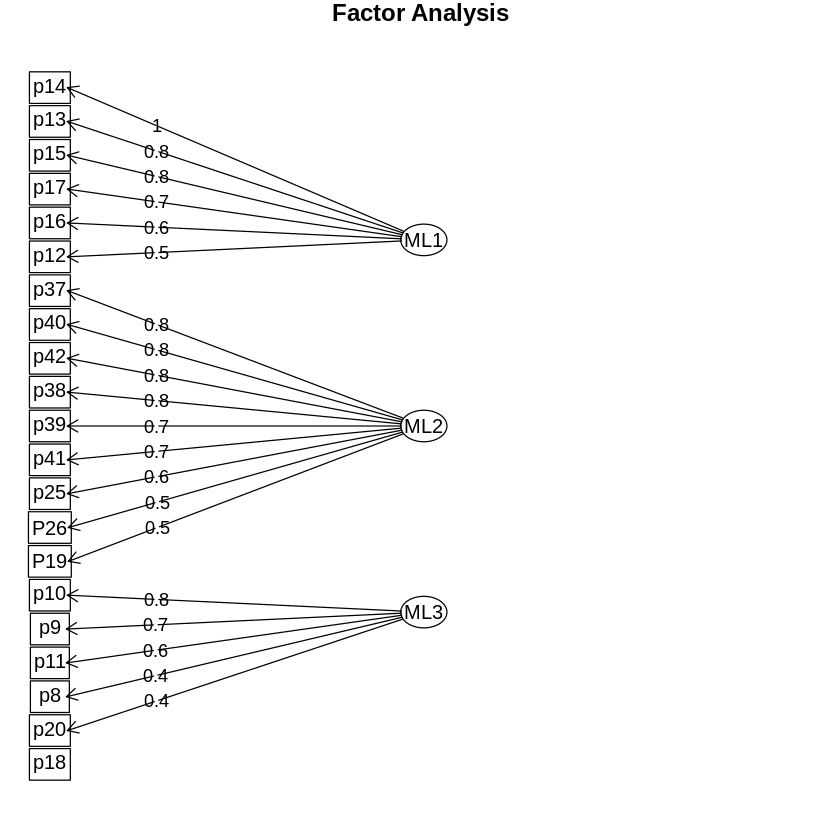

In [163]:
fa.diagram(poly_model_ord)

# Sugerido por el algoritmo

## Caso 4 cluster.

In [164]:
# Polychoric factor analysis
poly_model_ord = fa(data_ordinal, nfactor=4, cor="poly", fm="mle", rotate = "none")
poly_model_ord$loading

Warning message in cor.smooth(mat):
“Matrix was not positive definite, smoothing was done”



Loadings:
    ML2    ML1    ML3    ML4   
p8   0.259  0.377         0.356
p9   0.259         0.146  0.683
p10               -0.263  0.783
p11         0.108  0.175  0.662
p12 -0.214  0.510 -0.213  0.233
p13 -0.463  0.687              
p14 -0.579  0.808              
p15 -0.439  0.624         0.208
p16 -0.371  0.532         0.239
p17 -0.313  0.610  0.178       
p18  0.448  0.328 -0.297       
P19  0.691  0.717              
p20  0.446  0.446         0.261
p25  0.396 -0.204  0.571 -0.110
P26  0.584 -0.237  0.447 -0.310
p37  0.588         0.697       
p38  0.569         0.685  0.121
p39  0.595         0.594       
p40  0.710         0.627       
p41  0.591 -0.157  0.541       
p42  0.619 -0.171  0.697       

                 ML2   ML1   ML3   ML4
SS loadings    4.802 3.587 3.323 2.009
Proportion Var 0.229 0.171 0.158 0.096
Cumulative Var 0.229 0.399 0.558 0.653

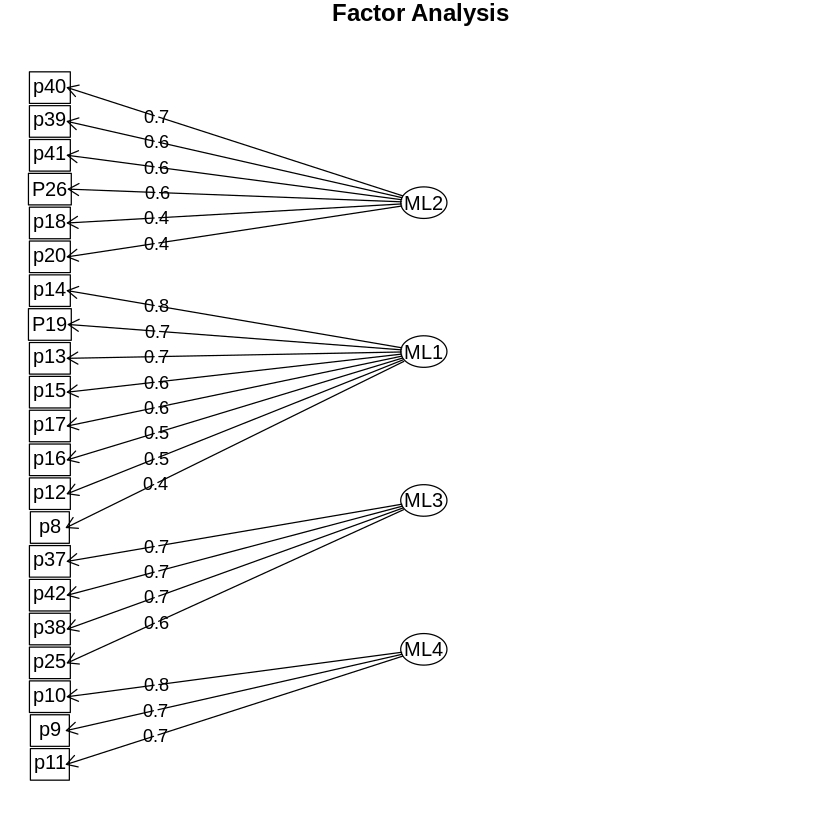

In [165]:
fa.diagram(poly_model_ord)

## Caso 5 cluster.

In [166]:
# Polychoric factor analysis
poly_model_ord = fa(data_ordinal, nfactor=5, cor="poly", fm="mle", rotate = "none")
poly_model_ord$loading

Warning message in cor.smooth(mat):
“Matrix was not positive definite, smoothing was done”



Loadings:
    ML3    ML2    ML5    ML1    ML4   
p8  -0.137         0.177  0.496  0.147
p9  -0.218  0.431  0.307  0.254  0.129
p10 -0.725  0.636         0.226  0.114
p11 -0.409  0.197  0.356  0.216       
p12 -0.492 -0.256 -0.137  0.255  0.265
p13 -0.416 -0.649         0.308       
p14 -0.504 -0.804         0.295       
p15 -0.498 -0.494         0.352 -0.167
p16 -0.574 -0.338         0.252       
p17 -0.286 -0.558  0.168  0.269       
p18  0.165        -0.310  0.472  0.216
P19  0.245                0.884  0.380
p20         0.149         0.885 -0.426
p25  0.368  0.243  0.509         0.288
P26  0.668  0.227  0.304         0.254
p37  0.509  0.277  0.665  0.206  0.167
p38  0.480  0.305  0.678  0.234       
p39  0.413  0.320  0.580  0.236  0.243
p40  0.605  0.297  0.564  0.178  0.373
p41  0.590  0.254  0.455  0.112  0.184
p42  0.555  0.336  0.657  0.158  0.155

                 ML3   ML2   ML5   ML1   ML4
SS loadings    4.450 3.116 2.971 2.928 0.986
Proportion Var 0.212 0.148 0.141 0.139 0

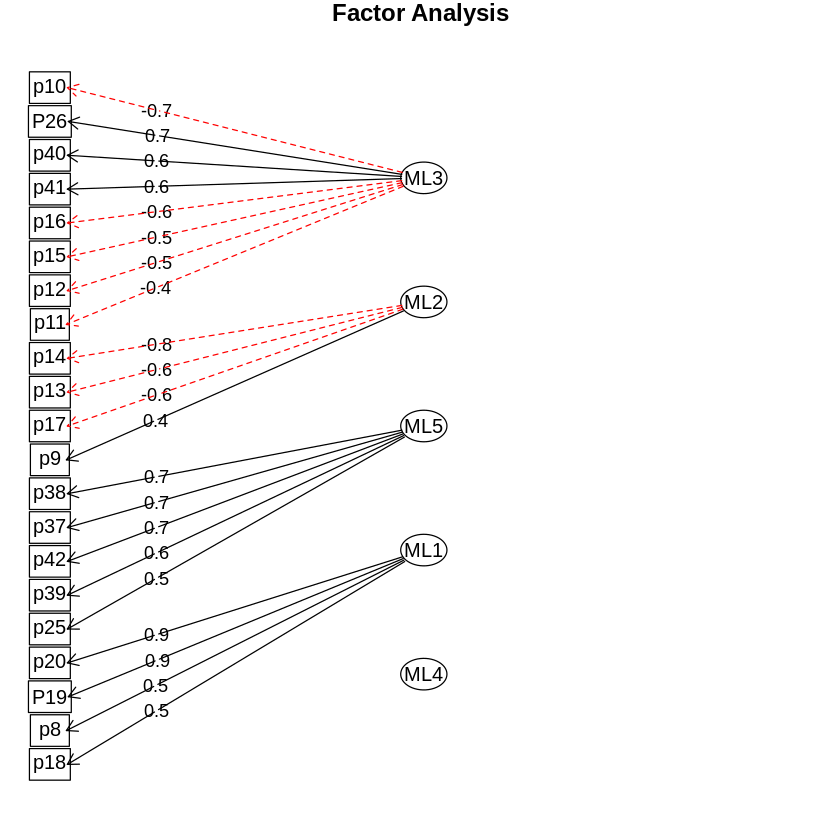

In [167]:
fa.diagram(poly_model_ord)